In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [40]:
# Specify the path to the Common Voice dataset
dataset_path = 'F:/cv-corpus-7.0-2021-07-21/en'

In [41]:
# Read the CSV file containing the metadata of the Common Voice dataset
metadata_path = f'{dataset_path}/train.tsv'
metadata_df = pd.read_csv(metadata_path, sep='\t')

In [42]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [43]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

In [44]:
metadata_df.groupby("gender")["gender"].unique()

gender
female    [female]
male        [male]
other      [other]
Name: gender, dtype: object

In [45]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


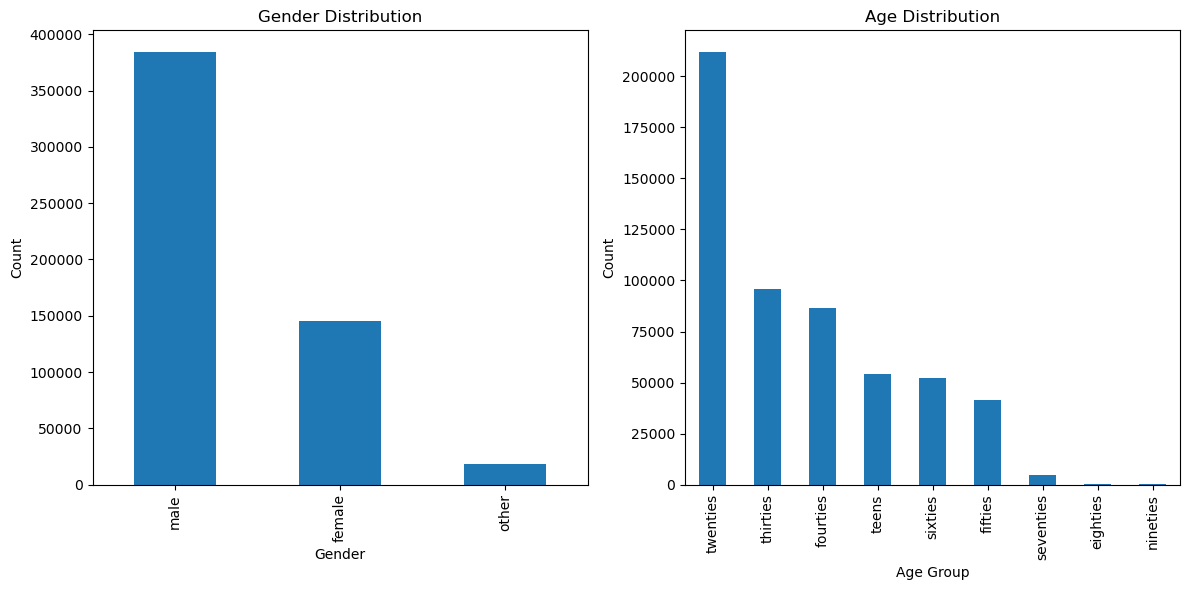

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [47]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

import pandas as pd
import numpy as np

# Define the variables
F10 = 'F10'
M10 = 'M10'
F20 = 'F20'
M20 = 'M20'
F30 = 'F30'
M30 = 'M30'
F40 = 'F40'
M40 = 'M40'
F50 = 'F50'
M50 = 'M50'
F60 = 'F60'
M60 = 'M60'
# Assign the 'class' values
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'female'), "class"] = F10
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'male'), "class"] = M10

metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'female'), "class"] = F20
metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'male'), "class"] = M20

metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'female'), "class"] = F30
metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'male'), "class"] = M30

metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'female'), "class"] = F40
metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'male'), "class"] = M40

metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'female'), "class"] = F50
metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'male'), "class"] = M50

metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'female'), "class"] = F60
metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'male'), "class"] = M60


metadata_df.dropna(subset=["class"], inplace=True)

metadata_df["class"] = metadata_df["class"].astype(int)

In [49]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


In [50]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

### metadata_df.head()

In [51]:
#After Decreasing the Speeach Data
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


In [52]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [53]:
# Adjust the sample sizes based on the available data
female = 'female'
male = 'male'
metadata_df.loc[(metadata_df["gender"] == 'male'),  "class"] = male
metadata_df.loc[(metadata_df["gender"] == 'female'), "class"] = female

In [55]:
metadata_df.dropna(subset=["class"], inplace=True)

#After Decreasing the Speeach Data
n_samples = len(metadata_df)
# get total teenagers samples
teenagers_samples = len(metadata_df[metadata_df['class'] == 'teenagers'])
# get total adults samples
adults_samples = len(metadata_df[metadata_df['class'] == 'adults'])
# get total senioradults samples
senioradults_samples = len(metadata_df[metadata_df['class'] == 'senioradults'])
print("Total samples:", n_samples)
print("Total teenagers samples:", teenagers_samples)
print("Total adults samples:", adults_samples)
print("Total seniouradults samples:", senioradults_samples)

### 6,000 samples and 18,000 samples per teenagers, adults, senior adults

In [56]:
# Get the counts for each gender-age group
female_counts = metadata_df.loc[metadata_df["gender"] == 'female'].groupby("age").size()
male_counts = metadata_df.loc[metadata_df["gender"] == 'male'].groupby("age").size()

# Adjust the sample sizes based on the available data
female_samples = metadata_df.loc[(metadata_df["gender"] == 'female')].sample(n=6000, random_state=42)
male_samples = metadata_df.loc[(metadata_df["gender"] == 'male')].sample(n=18000, random_state=42)

# Concatenate the samples back into the metadata_df
metadata_df = pd.concat([
    female_samples,
    male_samples
], ignore_index=True)

# After Sampling 80,000 the Speech Data
n_samples = len(metadata_df)
# get total female samples
female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
# get total male samples
male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
print("Total samples:", n_samples)
print("Total Female samples:", female_samples)
print("Total Male samples:", male_samples)

Total samples: 24000
Total Female samples: 6000
Total Male samples: 18000


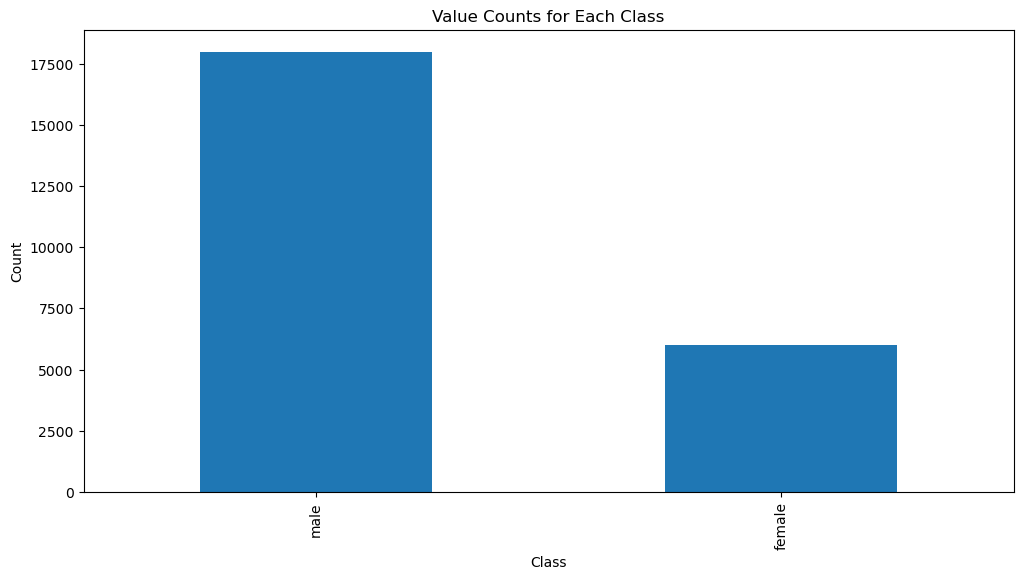

In [57]:
import matplotlib.pyplot as plt

# Get the value counts for each class
class_counts = metadata_df['class'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title('Value Counts for Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [58]:
metadata_df.groupby("class")["class"].unique()

class
female    [female]
male        [male]
Name: class, dtype: object

In [59]:
metadata_df.head(55)

client_id  \
0   c0fe32bac63de60315d7b9a944bb68fc3e4c22a91b7623...   
1   7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...   
2   251987ae2c46364e758f6899791c3dc99511274ccffce3...   
3   acbdf3a9cea45e9b3b7ae374d265d222f7ce1951fa898c...   
4   6213fe2b3a56b82e771c88615d3a0aad9468260cdae59a...   
5   29b8505586cd43382cd695da6b943f401104be710a5b60...   
6   eb171463e0b8beec4295c7c89975c971a65ad05727c781...   
7   e6dbbe39377aa0fe2851852b2c695c9c31094c80c9ccd2...   
8   57d9be2eeda5fbaad0290c45f4e95813da95e09633d5fd...   
9   57d9be2eeda5fbaad0290c45f4e95813da95e09633d5fd...   
10  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   
11  1e53b4eb924ef1576580f18044ad600c657209c2d9d35e...   
12  0b3d55acf115fdf88131d7324fa9a7e1a26542405b0671...   
13  29b8505586cd43382cd695da6b943f401104be710a5b60...   
14  fd52910d24299328945044ddd49dd2d79ef95c7b0d6e38...   
15  126d3ec8a9de73c224904bc613f47711b76ca9c8d6794b...   
16  7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...   
17  54dc820077b05bf576973afed1f32e6af12c378296b118...   
18  7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...   
19  7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...   
20  29b8505586cd43382cd695da6b943f401104be710a5b60...   
21  860306e6e5e4afd7156b115de6720427893bfed9d41079...   
22  54c78ad6adee4df63b5d3b5bab07e3f363d760bb91d667...   
23  70c21ca1cc3de05f3c23b11615cd7d5dd078e03cda0cd4...   
24  f3e727d7e4dd1b5753b4738566d835c2efa8340432b861...   
25  2e099dbb0a8b13173a2f35a7d4790af66940ff05244155...   
26  70c21ca1cc3de05f3c23b11615cd7d5dd078e03cda0cd4...   
27  f085bab07d295e6401c89f1f39807c45285a3b6c714d5d...   
28  e31822077e104d2f1781db7ce098c016abca0314515a35...   
29  e3a0e1f4a3f2b04e74c6a9b76358cfc05a5df96d5c0b86...   
30  c5dd26e9a252366165270530b726c835a52759212fda8d...   
31  ed0e4d79c6c2889459e88e11724dbd7f2cb2417e6a4320...   
32  5b571c91829ad913a11c854cb34932d753aea3490bb795...   
33  05812a8b0aa7547db9c9e8ecf0fac06f46f8af06635de6...   
34  b321f13752fb638bdd0fb726989758346d273dca6d3f21...   
35  aa229274711f2b10e408628ffc5e5ae8758bb022f781aa...   
36  7cbf197695734dc82496550a5fbeb46d23378a16671b19...   
37  3bc30a3a592bd5da650cb4196dfa11ded233081ca8fab8...   
38  57d9be2eeda5fbaad0290c45f4e95813da95e09633d5fd...   
39  46e325bc549826f452d9237b7922e49f3fc6009e90c3b7...   
40  8befb2ca667e2fd94be20c660449a39b6db22c18d35016...   
41  8449194e8b74b81d761d7a3786cdd5d099aff4f33737c7...   
42  c5a1d7a7e2f44161ce38ca328a06f1050e4b2b5938ebf9...   
43  2895ef52f5bd18954bdbdbe424b82cfd9a02cc4e6e3bca...   
44  eb171463e0b8beec4295c7c89975c971a65ad05727c781...   
45  2895ef52f5bd18954bdbdbe424b82cfd9a02cc4e6e3bca...   
46  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   
47  e0fca432de43e2427d0c75145df3200f26eaec3cfb8224...   
48  13fe2d4194885cf2a467daf7cc262b38df8bf3091d9c2d...   
49  5e7bf775118b2a888dc10c72f787202dd1a07f9e4fa051...   
50  83ea7bf72cf6dbf761a5cc956e93f24622ab0a1f4f8408...   
51  fd8233b9e60ba635cefb3d3130ae076b83e54d8e90e56e...   
52  5eaa49f00193ae8a891fa69e0c5a5ddbaf415ec00f344e...   
53  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   
54  f138d75a743543591fb23c61bbb2cfc4a204866aa791fd...   

                            path  \
0   common_voice_en_20079562.mp3   
1   common_voice_en_23008058.mp3   
2   common_voice_en_24961881.mp3   
3   common_voice_en_20038752.mp3   
4   common_voice_en_20923104.mp3   
5   common_voice_en_20113065.mp3   
6   common_voice_en_20325926.mp3   
7   common_voice_en_19819347.mp3   
8   common_voice_en_23997627.mp3   
9   common_voice_en_23834483.mp3   
10  common_voice_en_24921391.mp3   
11  common_voice_en_24762558.mp3   
12  common_voice_en_27194340.mp3   
13  common_voice_en_20782066.mp3   
14  common_voice_en_22323764.mp3   
15  common_voice_en_22021605.mp3   
16  common_voice_en_21783228.mp3   
17  common_voice_en_20162376.mp3   
18  common_voice_en_22730059.mp3   
19  common_voice_en_19374591.mp3   
20  common_voice_en_20128804.mp3   
21  common_voice_en_19693718.mp3   
22  common_voice_en_201

In [60]:
metadata_df.groupby("class")["class"].unique()

class
female    [female]
male        [male]
Name: class, dtype: object

In [61]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

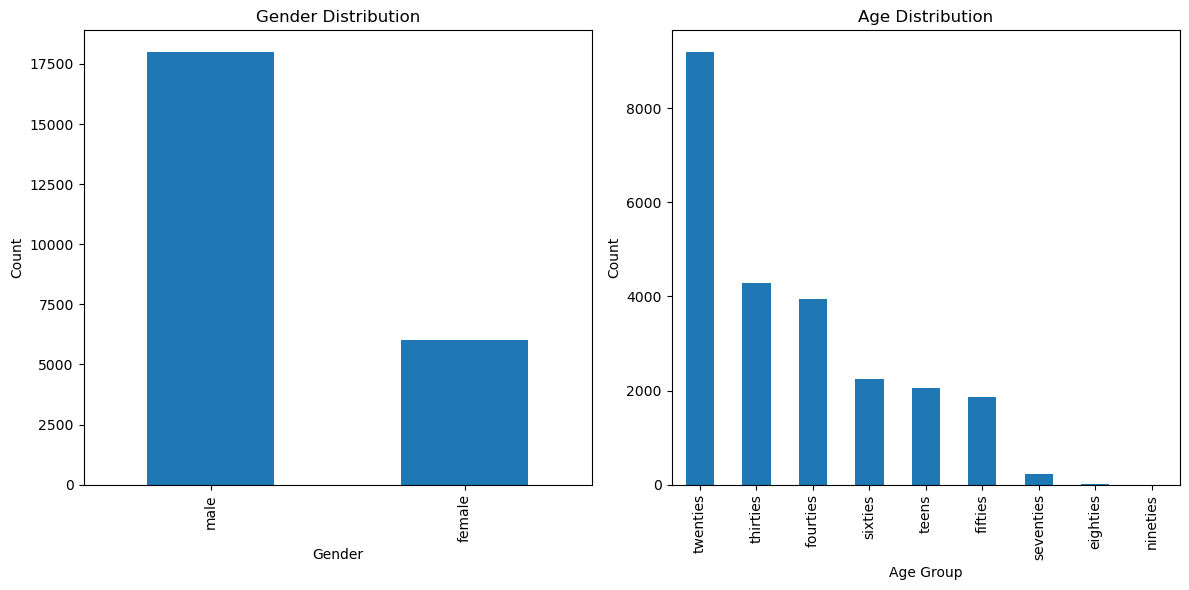

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [63]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [64]:
 metadata_df.count()

client_id     24000
path          24000
sentence      24000
up_votes      24000
down_votes    24000
age           23864
gender        24000
accent        16738
locale        24000
segment           0
class         24000
dtype: int64

In [65]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 200

Text(0.5, 1.0, 'Gender')

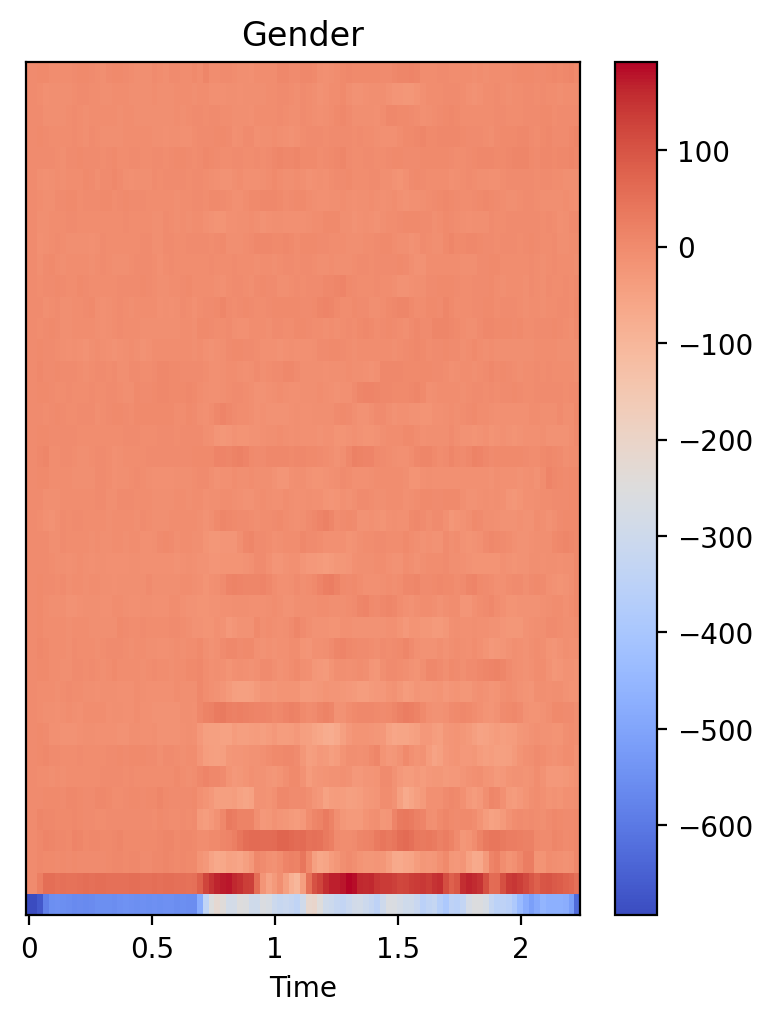

In [66]:

audio_path =  "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_1.mp3"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("Gender")

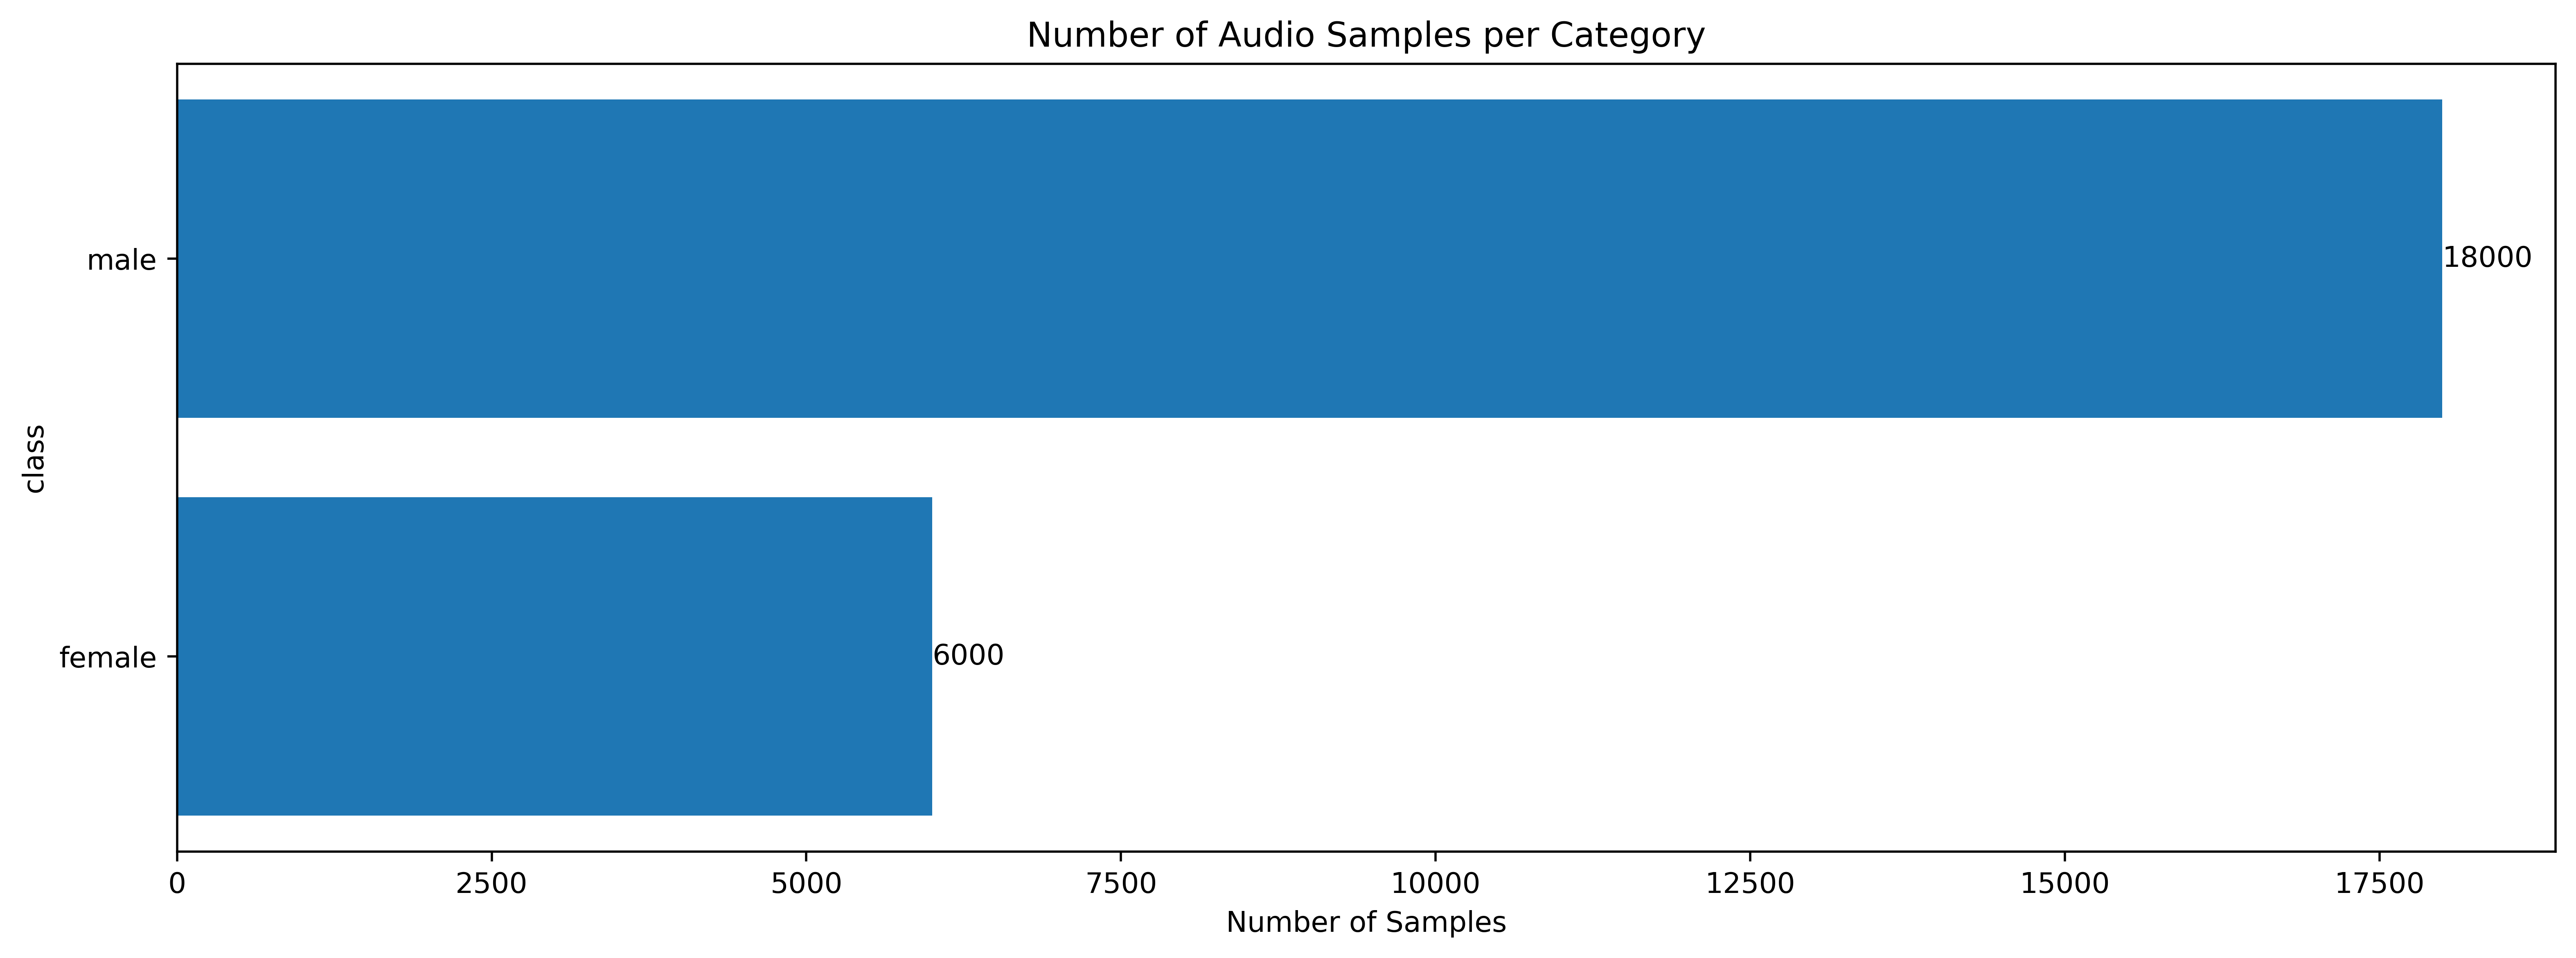

In [67]:
x = metadata_df["class"].unique()
y = metadata_df["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("class")
plt.show()

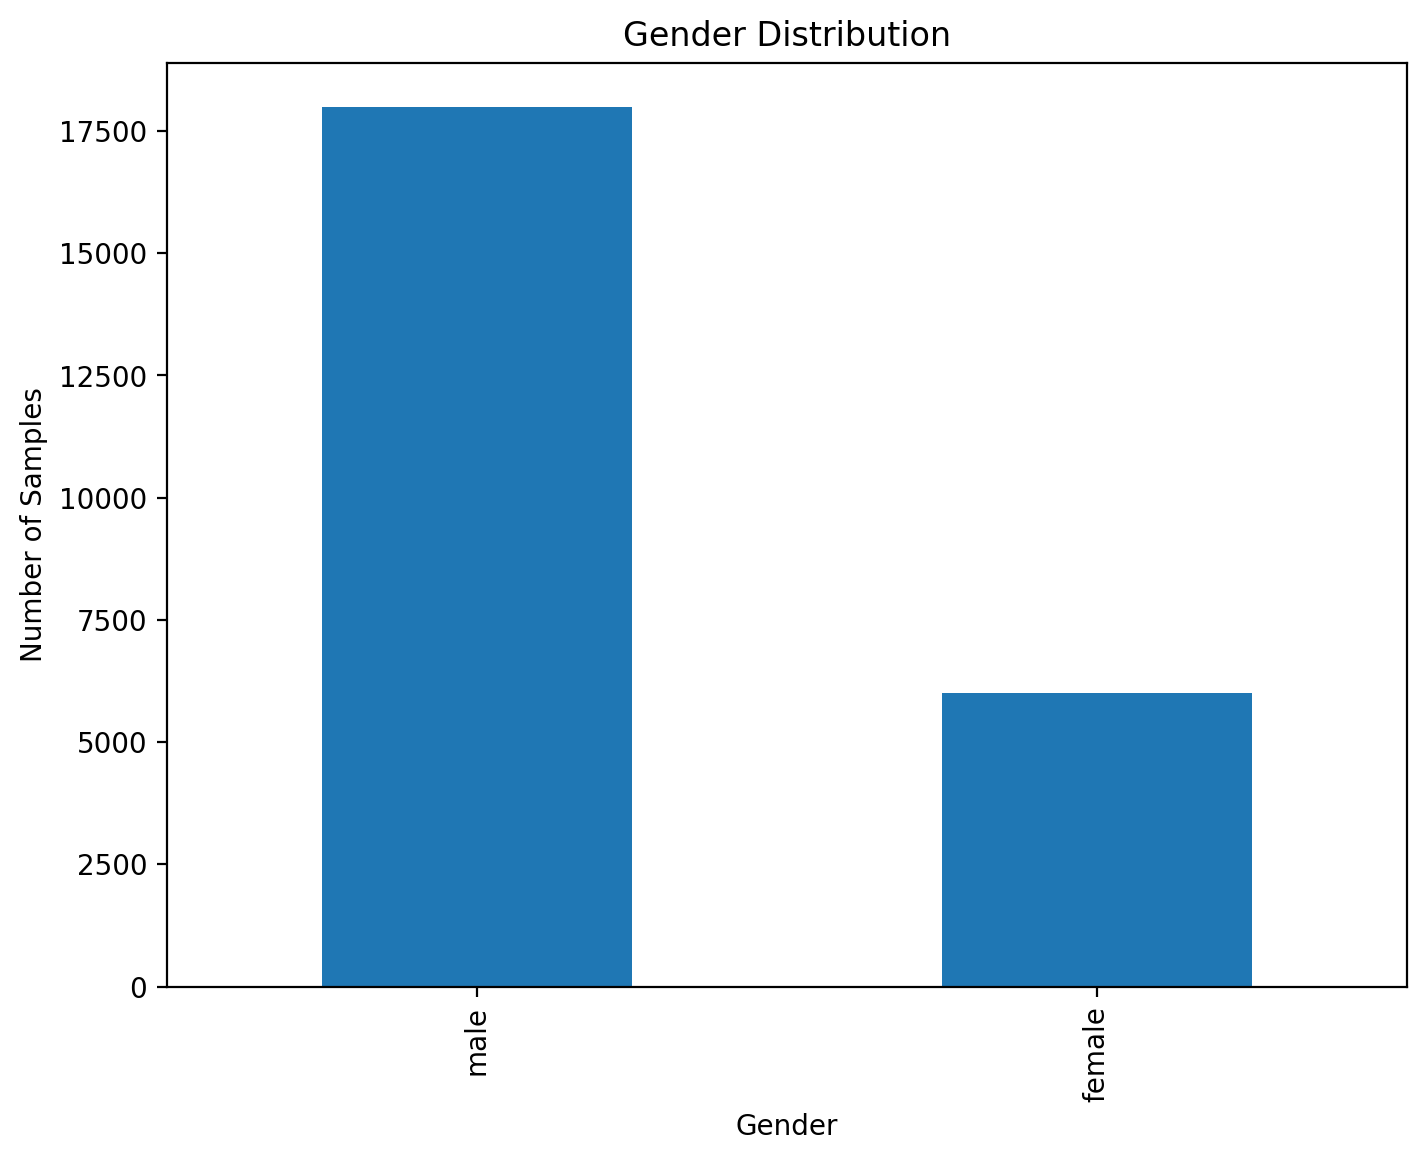

In [68]:
import matplotlib.pyplot as plt

# Plot histogram for gender
plt.figure(figsize=(8, 6))
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [69]:
import IPython.display as ipd
import librosa
import lazy_loader as lazy
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [70]:
#!pip install resampy

In [71]:
#!pip install --upgrade librosa

In [72]:
#!pip install resampy

In [73]:
#!pip3 install resampy

In [74]:
#!pip install pandas

In [75]:
import resampy

In [76]:
#!pip install --upgrade librosa

In [77]:
metadata_df.head()

client_id  \
0  c0fe32bac63de60315d7b9a944bb68fc3e4c22a91b7623...   
1  7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...   
2  251987ae2c46364e758f6899791c3dc99511274ccffce3...   
3  acbdf3a9cea45e9b3b7ae374d265d222f7ce1951fa898c...   
4  6213fe2b3a56b82e771c88615d3a0aad9468260cdae59a...   

                           path  \
0  common_voice_en_20079562.mp3   
1  common_voice_en_23008058.mp3   
2  common_voice_en_24961881.mp3   
3  common_voice_en_20038752.mp3   
4  common_voice_en_20923104.mp3   

                                            sentence  up_votes  down_votes  \
0  Swedish designer Helena Horstedt and jewelry a...         2           1   
1  Increasing speed, changing course, and antiair...         2           0   
2  Generally, Sumilao's physical configuration is...         2           1   
3  Her first book was written in English: On the ...         3           0   
4  Marilyn became a vocalist, but with minor char...         2           0   

        age  gender accent locale  segment   class  
0  fourties  female    NaN     en      NaN  female  
1   sixties  female     us     en      NaN  female  
2     teens  female    NaN     en      NaN  female  
3     teens  female    NaN     en      NaN  female  
4  thirties  female    NaN     en      NaN  female

In [86]:
import os
import librosa
import numpy as np
from tqdm import tqdm

# List to store the extracted features and labels
extracted = []

# Iterate over each row in the DataFrame within the specified range
#for index_num, row in tqdm(metadata_df.iloc[:1045].iterrows()):
#for index_num, row in tqdm(metadata_df.iloc[:120002].iterrows()):
for index_num, row in tqdm(metadata_df.iloc[:23999].iterrows()):
    # Get the file path
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    
    # Get the file label
    final_class_label = row["class"]
    
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
    
    # Extract the features (MFCC)
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    
    # Feature scaling
    scaled_features = np.mean(features.T, axis=0)
    
    # Store the features and label in the list
    extracted.append([scaled_features, final_class_label])

23999it [39:25, 10.15it/s]


desired_duration=10
def feature_extractor(filename):
    data,sr = librosa.load(filename, duration = desired_duration, res_type='kaise_best')
    if len(data) < sr * desired_duration:
        data = np.pad(data, (0, sr * desired_duration - len(data)))
         
    
    mfcc_features = librosa.feature.mfcc(y=data,sr=samp_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

#Runtime - 2min 14 sec 775 iterations for 3 clips per bird
from tqdm import tqdm #Allows to see progress
extracted_features=[]
for index_num,row in tqdm(metadata_df.iterrows()):
    final_class_labels=row["class"]
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    data=feature_extractor(file_path)
    extracted_features.append([data,final_class_labels])

In [87]:
# create a new dataframe
import pandas as pd
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_dffinal2classmalefemale.pkl")
extracted_df.head(50)

feature   class
0   [-277.01794, 103.540634, 6.3847003, 34.824364,...  female
1   [-634.6964, 88.11956, -14.552737, 14.994406, -...  female
2   [-460.11765, 85.31062, -1.1657284, 35.022804, ...  female
3   [-502.5768, 83.42134, 23.259592, 17.862558, 1....  female
4   [-249.92755, 73.348305, -10.374596, 19.973017,...  female
5   [-231.7319, 115.49884, -43.16489, 26.018341, -...  female
6   [-281.29404, 68.94766, -21.630215, 30.624329, ...  female
7   [-301.98267, 72.97377, -16.998255, 29.10323, -...  female
8   [-253.32336, 43.2205, 4.0562797, 24.634315, -2...  female
9   [-277.53955, 63.11005, 1.7451605, 29.385855, -...  female
10  [-319.0091, 84.82184, -6.960057, 32.432323, -1...  female
11  [-295.30627, 96.43112, -32.648884, 24.97497, 1...  female
12  [-250.92053, 84.43232, 4.5317454, 4.815545, -4...  female
13  [-267.67178, 111.37619, -28.076199, 16.006197,...  female
14  [-248.04936, 70.97624, -23.4753, 17.689423, -2...  female
15  [-382.3208, 72.02817, -0.9438295, 12.398055, -...  female
16  [-401.46045, 108.45101, -22.538248, 11.795503,...  female
17  [-270.4964, 89.22893, -8.961898, 32.282814, -1...  female
18  [-376.2155, 102.4253, -20.386368, 4.975355, -9...  female
19  [-316.64746, 107.20271, -10.511036, 10.065409,...  female
20  [-238.88576, 109.995926, -36.76719, 26.103603,...  female
21  [-510.7446, 62.866, 5.8226113, 19.111637, -11....  female
22  [-515.5828, 68.65217, 19.519588, 12.609861, -2...  female
23  [-344.32172, 107.560646, 1.0188674, 41.568146,...  female
24  [-406.3318, 62.50868, -5.083039, 15.357342, -1...  female
25  [-384.09372, 137.855, 12.918966, 17.129068, 10...  female
26  [-374.60764, 92.03985, -8.100897, 21.80019, -3...  female
27  [-439.8245, 121.67723, -28.355404, 19.410778, ...  female
28  [-292.8688, 143.9185, -18.301212, 19.816624, -...  female
29  [-366.2932, 89.42667, -9.242876, 27.17336, 6.3...  female
30  [-352.1009, 103.65943, -1.3016725, 31.084295, ...  female
31  [-290.16815, 66.67774, 2.8413317, 12.35822, 4....  female
32  [-318.95782, 117.11445, -18.915707, 1.602954, ...  female
33  [-363.29486, 121.13126, 6.9363217, 1.6144489, ...  female
34  [-330.50098, 79.88639, -28.036556, 17.54605, -...  female
35  [-288.75842, 95.53709, -5.972671, 14.034834, -...  female
36  [-315.2902, 89.88445, -24.580692, 29.421127, -...  female
37  [-361.70258, 91.69202, -15.513238, 35.838066, ...  female
38  [-254.93877, 57.979607, -0.3482283, 28.092506,...  female
39  [-388.44037, 91.71067, -14.909436, -13.434339,...  female
40  [-387.74612, 95.36501, 8.65995, 27.217945, -13...  female
41  [-467.9255, 73.12282, 20.574404, 11.413315, -1...  female
42  [-298.1515, 56.355366, 0.99397814, 39.496647, ...  female
43  [-366.76993, 86.38187, -9.895582, 30.558437, -...  female
44  [-292.225, 57.537086, -20.34181, 33.14426, -33...  female
45  [-336.49576, 96.521675, -21.694267, 31.229221,...  female
46  [-346.673, 90.22518, -6.777631, 12.088445, -0....  female
47  [-427.20142, 74.06612, 21.80572, 43.951527, -1...  female
48  [-421.44644, 101.178345, 8.722685, -19.515156,...  female
49  [-327.80667, 114.06164, 17.09901, 23.113136, -...  female

# create a new dataframe
extracted = []
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df1.pkl")
extracted_df.head(55)

## Data Preprocessing
### Distribute the data to X and Y

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
final = pd.read_pickle("extracted_dffinal2classmalefemale.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

### Split the data into train and test sets

In [89]:
# split the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  19199
Number of testing samples =  4800


### Model 1 - ANN
#### Building the model

In [90]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,410,752 (5.38 MB)

 Trainable params: 1,410,752 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model

In [91]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Fitting the model

In [92]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("ANN_Model.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8155 - loss: 0.7928 - val_accuracy: 0.9356 - val_loss: 0.1843
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9325 - loss: 0.1779 - val_accuracy: 0.9463 - val_loss: 0.1597
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9394 - loss: 0.1630 - val_accuracy: 0.9421 - val_loss: 0.1712
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9455 - loss: 0.1477 - val_accuracy: 0.9510 - val_loss: 0.1514
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9474 - loss: 0.1416 - val_accuracy: 0.9431 - val_loss: 0.1764
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9536 - loss: 0.1278 - val_accuracy: 0.9479 - val_loss: 0.1399
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9565 - loss: 0.1172 - val_accuracy: 0.9513 - val_loss: 0.1591
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9634 - loss: 0.1084 - val_accu

ANN Model Saved


## Results

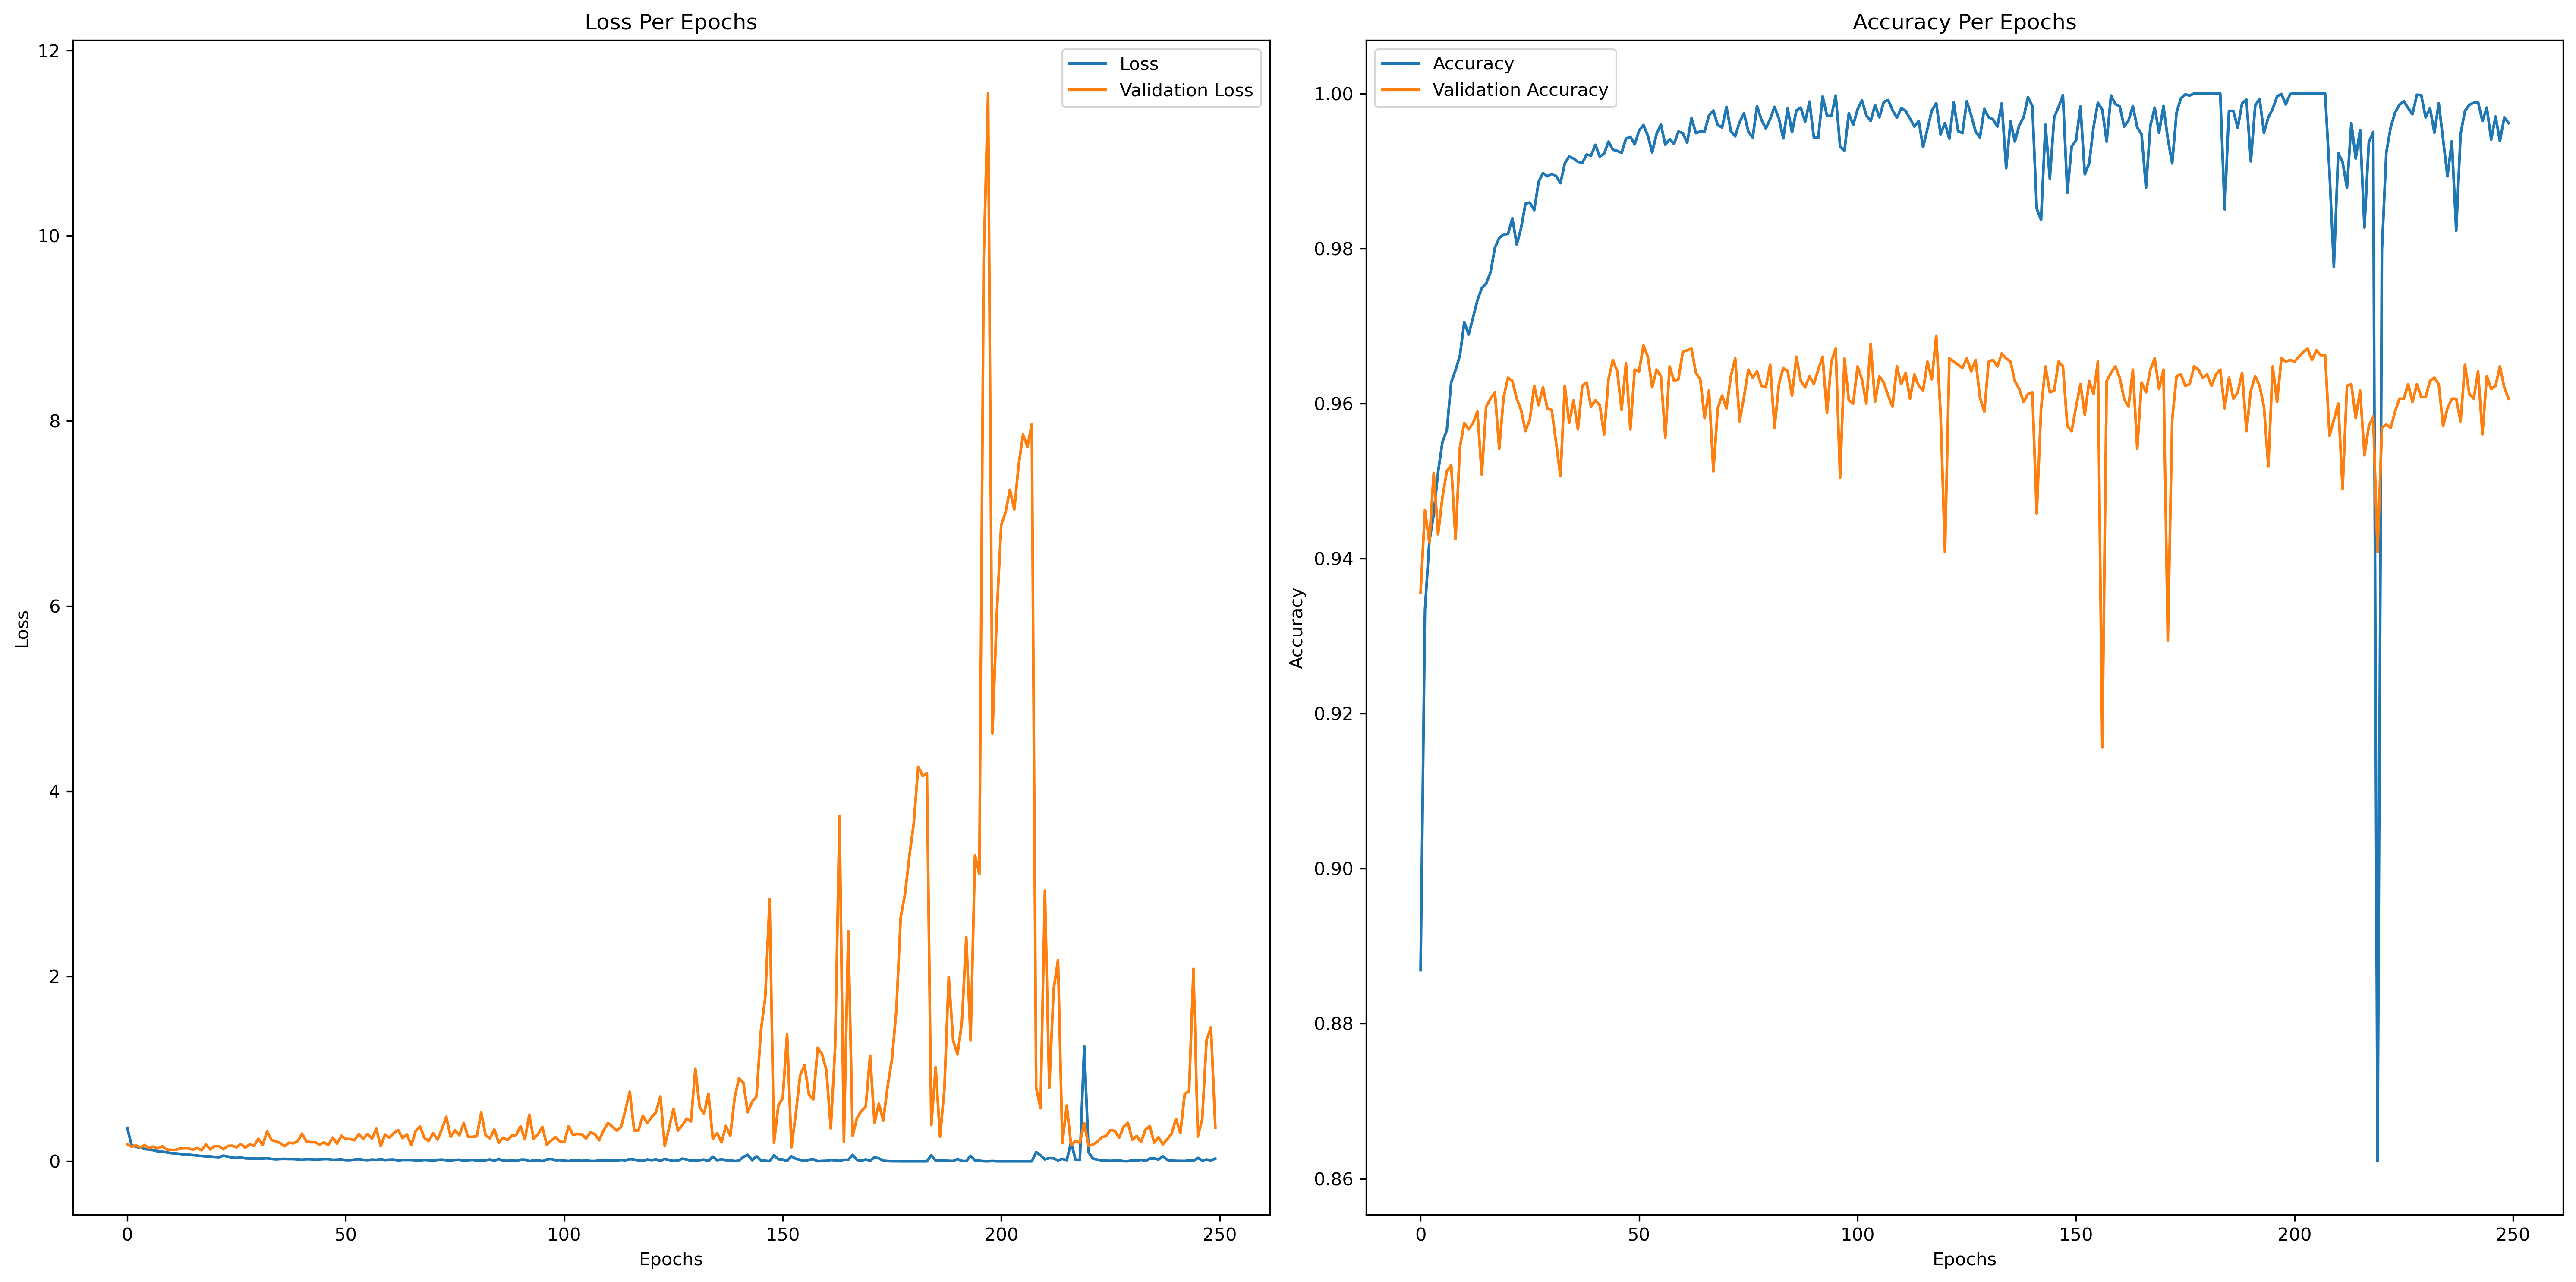

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [95]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [96]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])

In [97]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_18944712.mp3"
# get the output
ANN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
ANN has predicted the class as  -->  male


In [98]:
# Evaluate the performance of the speaker recognition model
speaker_loss, speaker_accuracy = ANN_Model.evaluate(X_test, y_test)
print(f"Speaker Recognition Accuracy: {speaker_accuracy * 100:.2f}%")

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.4636
Speaker Recognition Accuracy: 96.06%


In [99]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['male','female']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1210
           1       0.97      0.97      0.97      3590

    accuracy                           0.96      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.96      0.96      0.96      4800

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

        male       0.92      0.92      0.92      1210
      female       0.97      0.97      0.97      3590

    accuracy                           0.96      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.96      0.96      0.96      4800



In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = ANN_Model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=['teenagers','adults','senioradults'], columns=['teenagers','adults','senioradults'])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1115   95]
 [  94 3496]]


ValueError: Shape of passed values is (2, 2), indices imply (3, 3)

<Figure size 2000x1600 with 0 Axes>

## Model 2 - CNN### 
Preprocessing

In [102]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1000, activation='relu'))
cnn_model.add(Dense(750, activation='relu'))
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(250, activation='relu'))
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(50, activation='relu'))
num_classes = 2 # Replace 3 with the actual number of classes in your data
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1000)           │     3,841,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147,712 (19.64 MB)

 Trainable params: 5,147,712 (19.64 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_results=cnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8501 - loss: 0.3775 - val_accuracy: 0.9383 - val_loss: 0.1740
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9370 - loss: 0.1759 - val_accuracy: 0.9454 - val_loss: 0.1499
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9463 - loss: 0.1494 - val_accuracy: 0.9438 - val_loss: 0.1856
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9586 - loss: 0.1231 - val_accuracy: 0.9533 - val_loss: 0.1378
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9648 - loss: 0.0970 - val_accuracy: 0.9548 - val_loss: 0.1393
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9718 - loss: 0.0811 - val_accuracy: 0.9529 - val_loss: 0.1593
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9767 - loss: 0.0660 - val_accuracy: 0.9552 - val_loss: 0.1576
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9819 - loss: 0

In [104]:
cnn_model.save("cnn_model.h5")
print("cnn_model  Saved")

cnn_model  Saved


In [105]:
train_hist_m2 = pd.DataFrame(cnn_results.history)
train_m2 = round(time.time() - t0, 3)

In [106]:
# function to predict the feature
def CNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(cnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN has predicted the class as  --> ", predicted_class[0])

In [107]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
CNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
CNN has predicted the class as  -->  male


In [108]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
# Define the labels for the classification report
labels = ['male','female']

# Generate classification report
classification_report_output = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report_output)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

        male       0.93      0.93      0.93      1210
      female       0.98      0.98      0.98      3590

    accuracy                           0.96      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.96      0.96      0.96      4800



150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

        male       0.93      0.93      0.93      1210
      female       0.98      0.98      0.98      3590

    accuracy                           0.96      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.96      0.96      0.96      4800

[[1125   85]
 [  83 3507]]


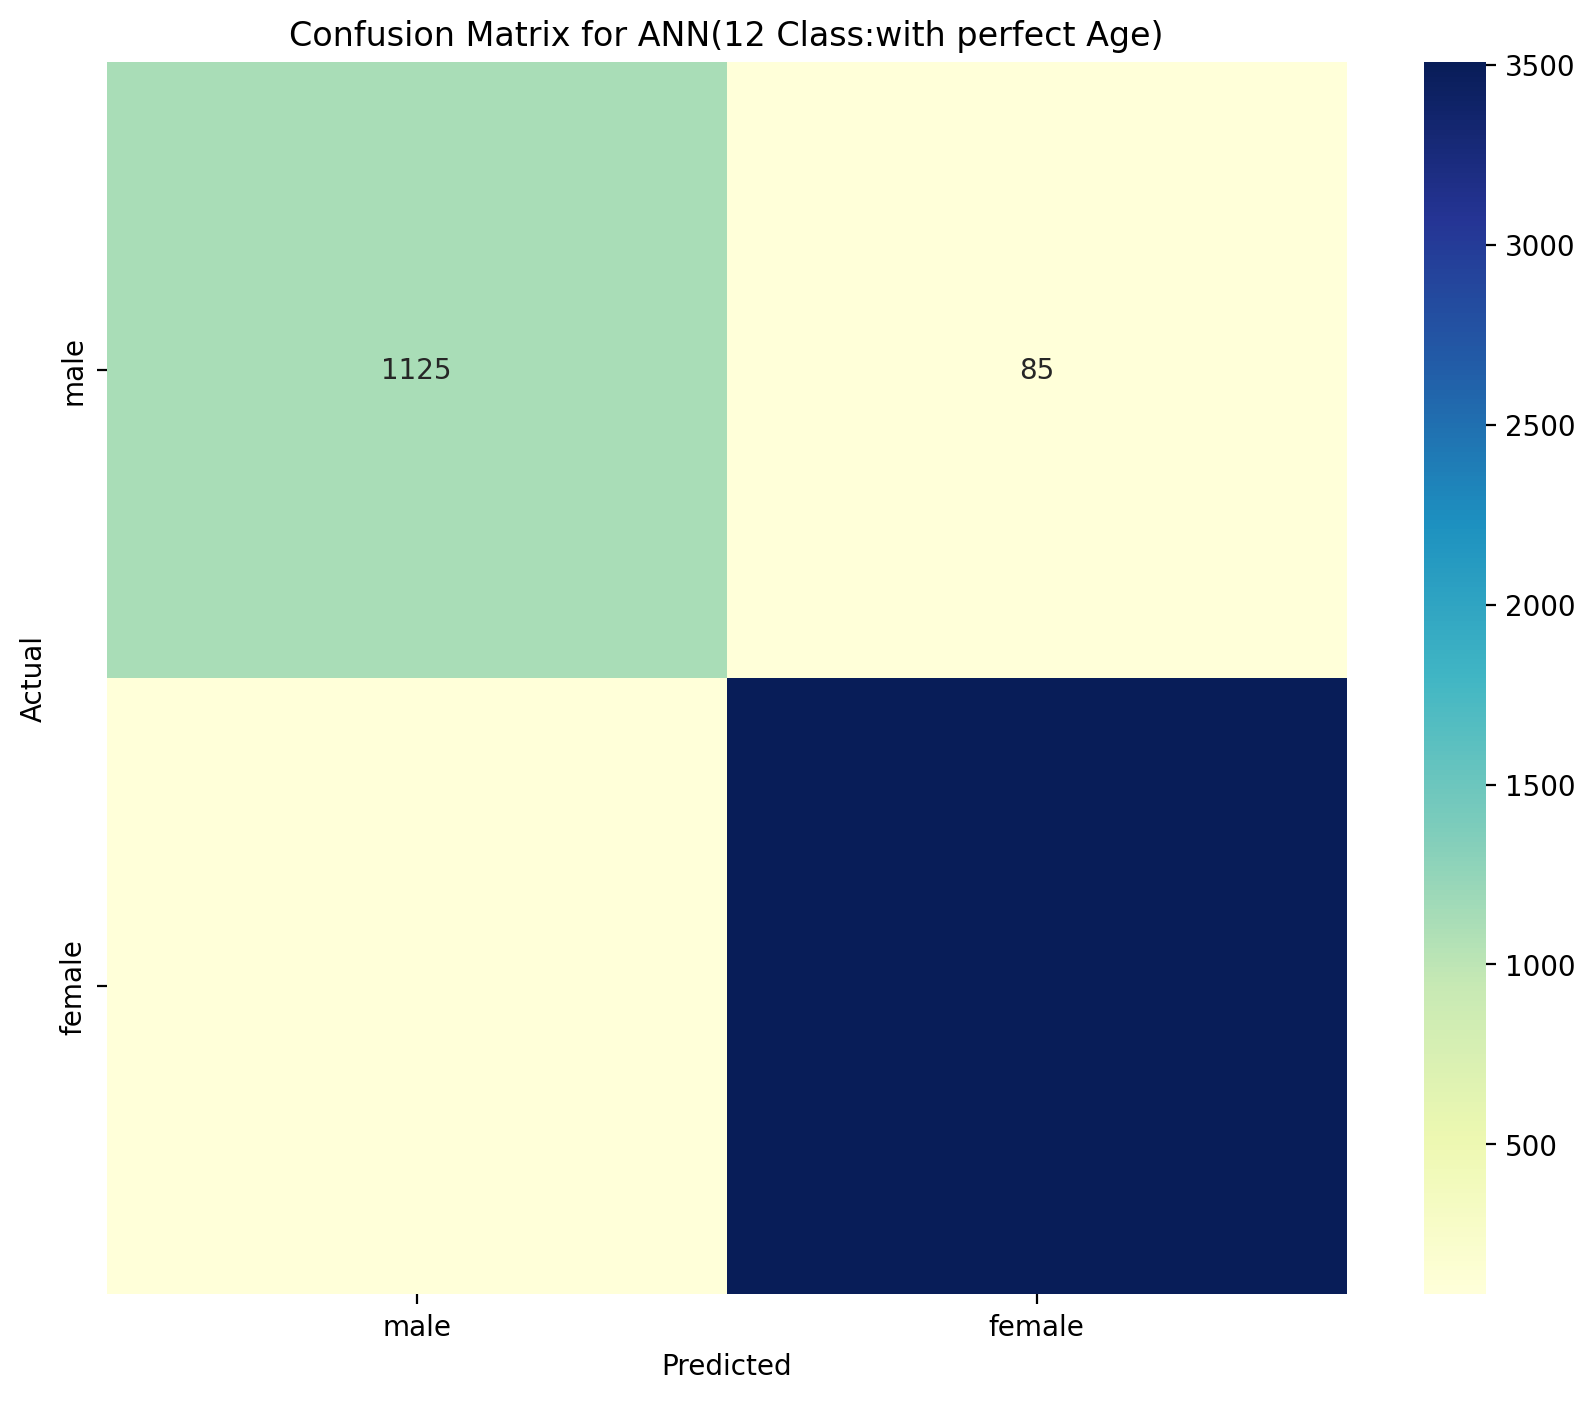

In [111]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['male','female']

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)
print(confusion_mat)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu",
           xticklabels=labels,
           yticklabels=labels)
plt.title('Confusion Matrix for ANN(12 Class:with perfect Age)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

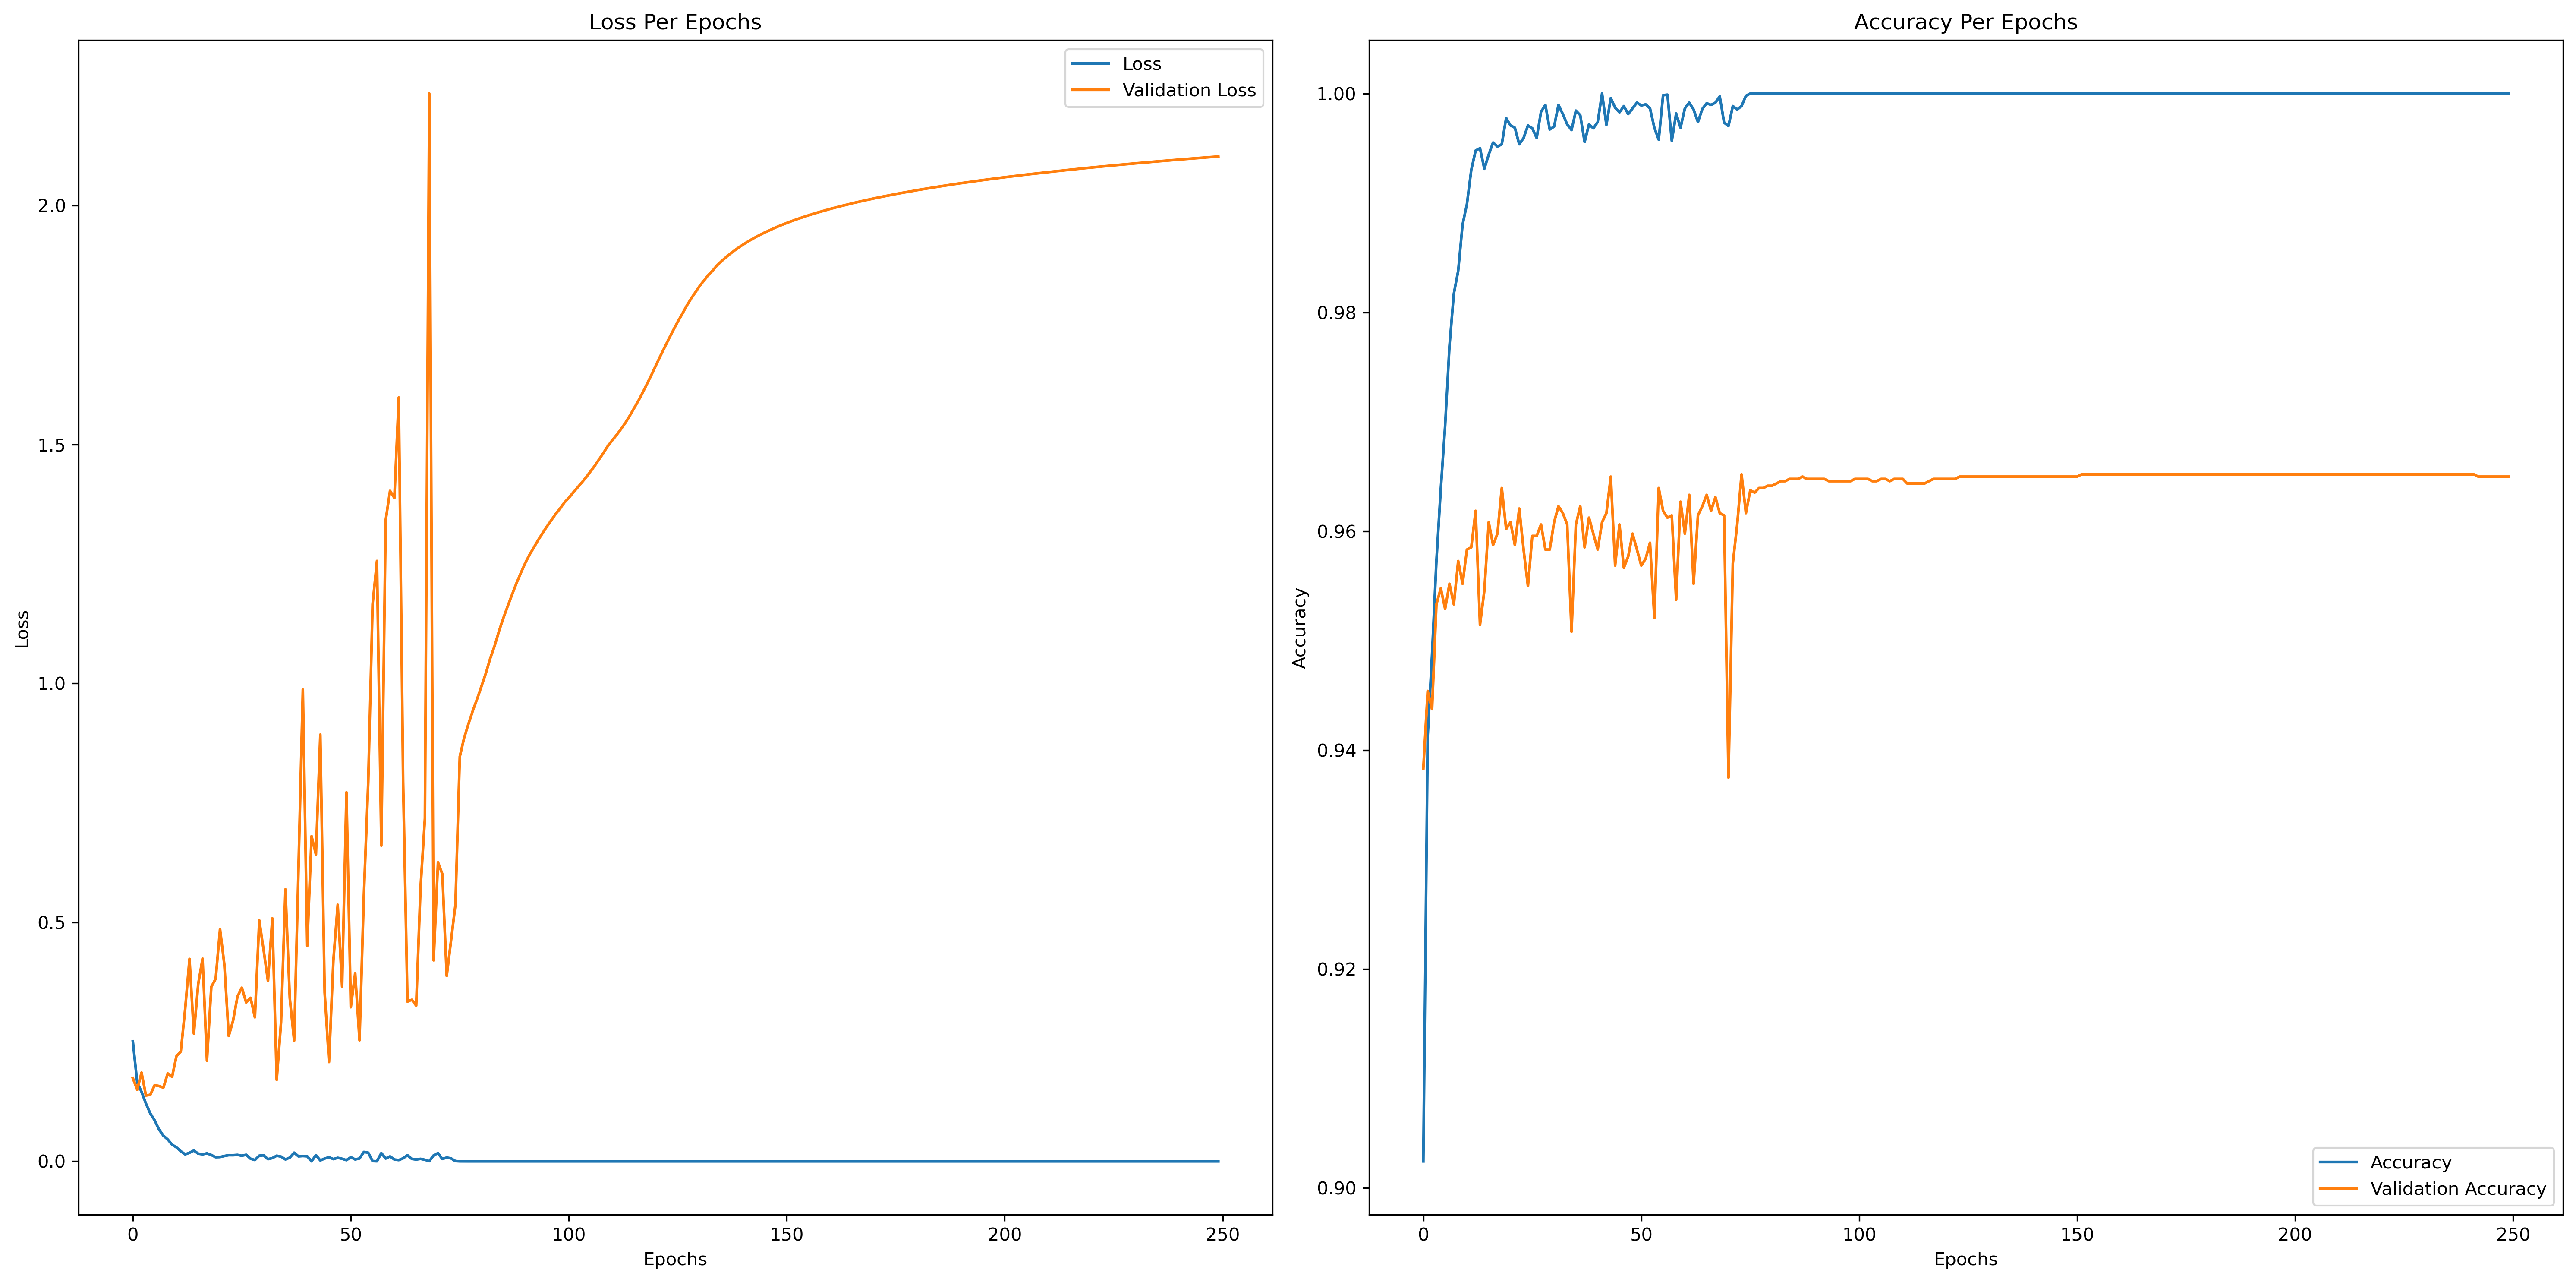

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [113]:
train_hist_m1 = pd.DataFrame(cnn_results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = cnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = cnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
# Define the labels for the classification report
labels = ['male','female']
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[1125   85]
 [  83 3507]]


ValueError: Shape of passed values is (2, 2), indices imply (6, 6)

<Figure size 2000x1600 with 0 Axes>

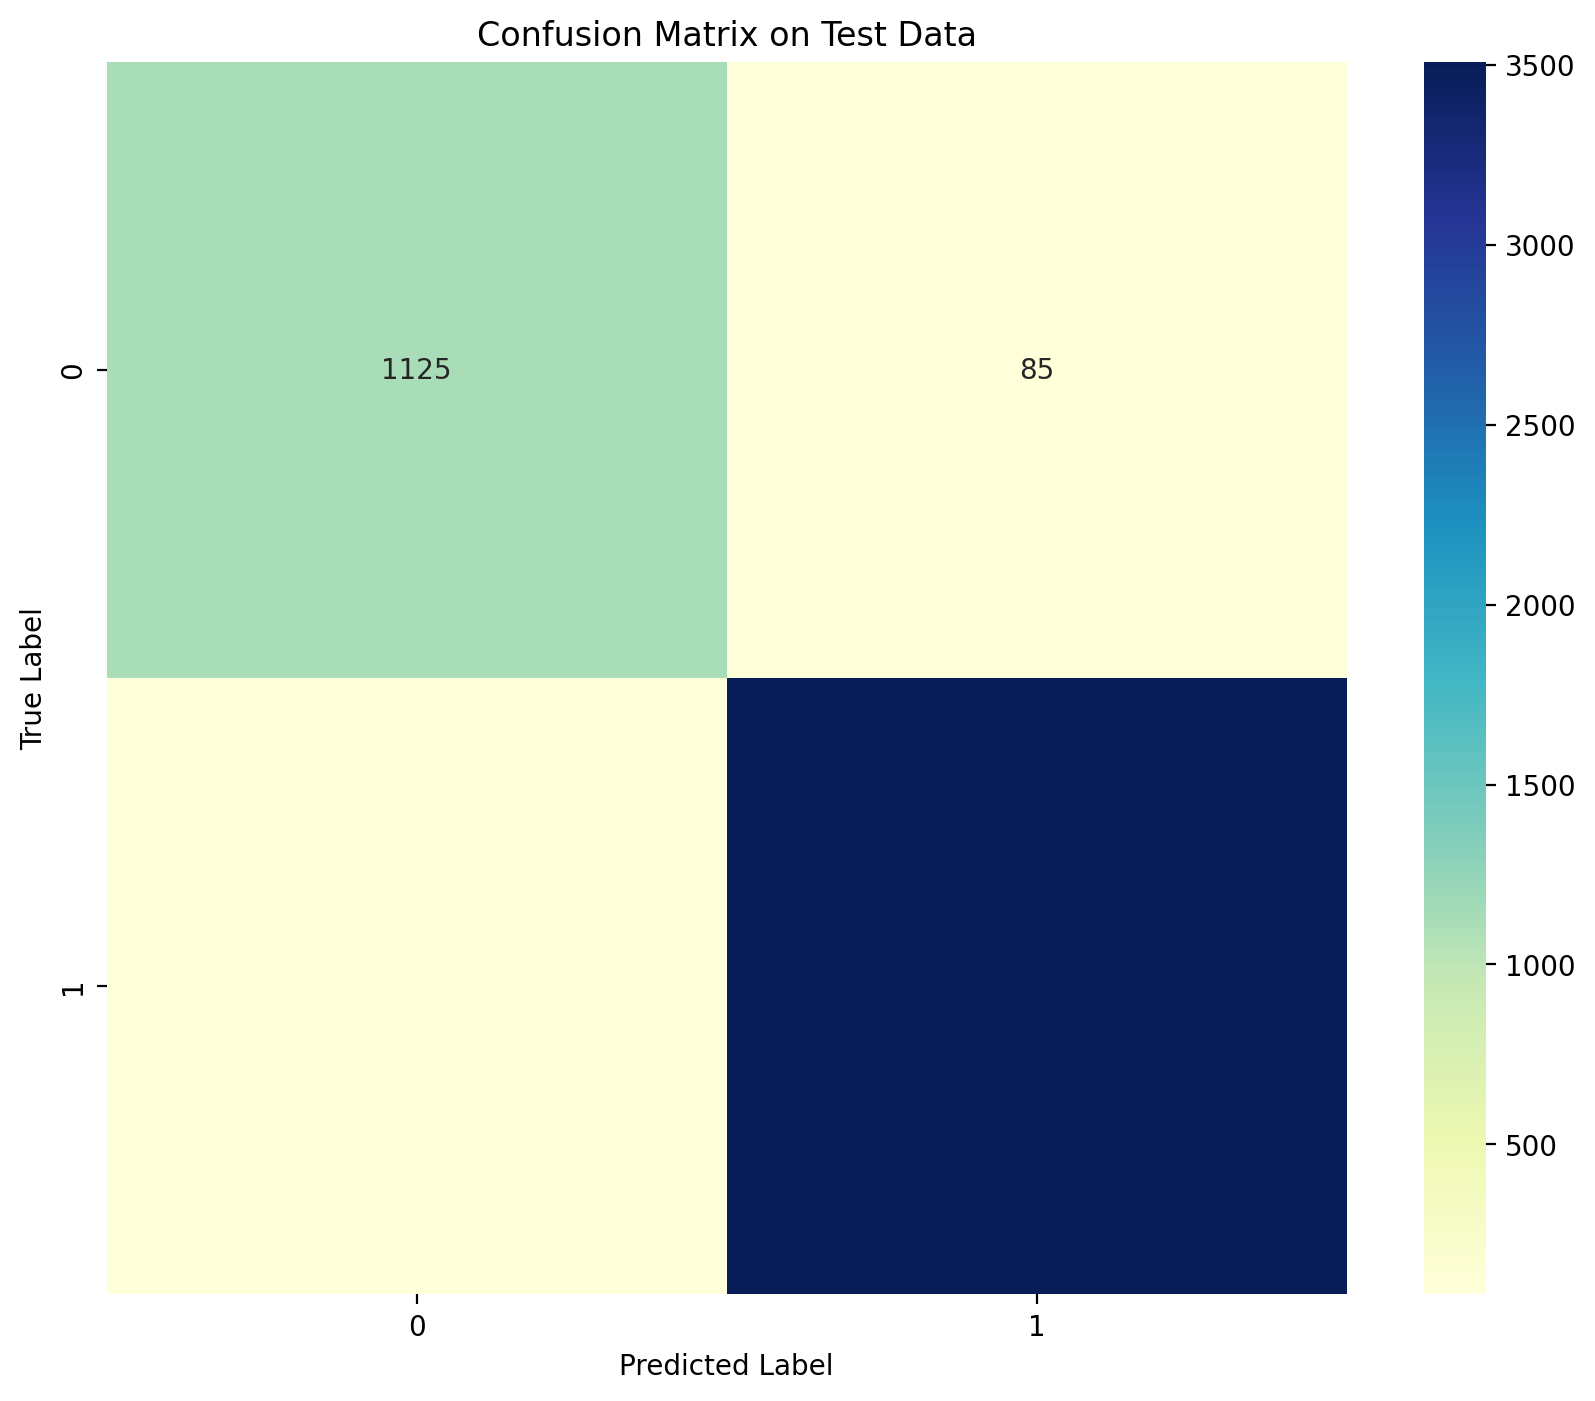

In [114]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)

# Get the unique class labels
class_labels = np.unique(y_test.argmax(axis=1))

# Create the confusion matrix DataFrame
df_cm = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model 3-LSTM

In [115]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1000, activation='relu'))
lstm_model.add(Dense(750, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(250, activation='relu'))
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(50, activation='relu'))
num_classes = 2 # Replace 3 with the actual number of classes in your data
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,648 (5.20 MB)

 Trainable params: 1,363,648 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_results=lstm_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7462 - loss: 0.5736 - val_accuracy: 0.7479 - val_loss: 0.5644
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7454 - loss: 0.5676 - val_accuracy: 0.7487 - val_loss: 0.5641
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7537 - loss: 0.5588 - val_accuracy: 0.7481 - val_loss: 0.5643
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7497 - loss: 0.5602 - val_accuracy: 0.7542 - val_loss: 0.4424
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7720 - loss: 0.4436 - val_accuracy: 0.8229 - val_loss: 0.3813
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7952 - loss: 0.4133 - val_accuracy: 0.8690 - val_loss: 0.3376
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8698 - loss: 0.3333 - val_accuracy: 0.8708 - val_loss: 0.3207
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8758 - loss: 0

In [117]:
lstm_model.save("lstm_model.h5")
print("lstm_model  Saved")

lstm_model  Saved


In [118]:
# function to predict the feature
def LSTM_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(lstm_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("LSTM has predicted the class as  --> ", predicted_class[0])

In [119]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
LSTM_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
LSTM has predicted the class as  -->  male


In [121]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
#
#confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
#print(confusion_mat)
# Define the labels for the classification report
labels = ['male','female']

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1210
           1       0.95      0.95      0.95      3590

    accuracy                           0.92      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.92      0.92      0.92      4800

              precision    recall  f1-score   support

        male       0.85      0.84      0.85      1210
      female       0.95      0.95      0.95      3590

    accuracy                           0.92      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.92      0.92      0.92      4800



In [122]:
train_hist_m3 = pd.DataFrame(lstm_results.history)
#train_m3 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


NameError: name 'y_train_pred' is not defined

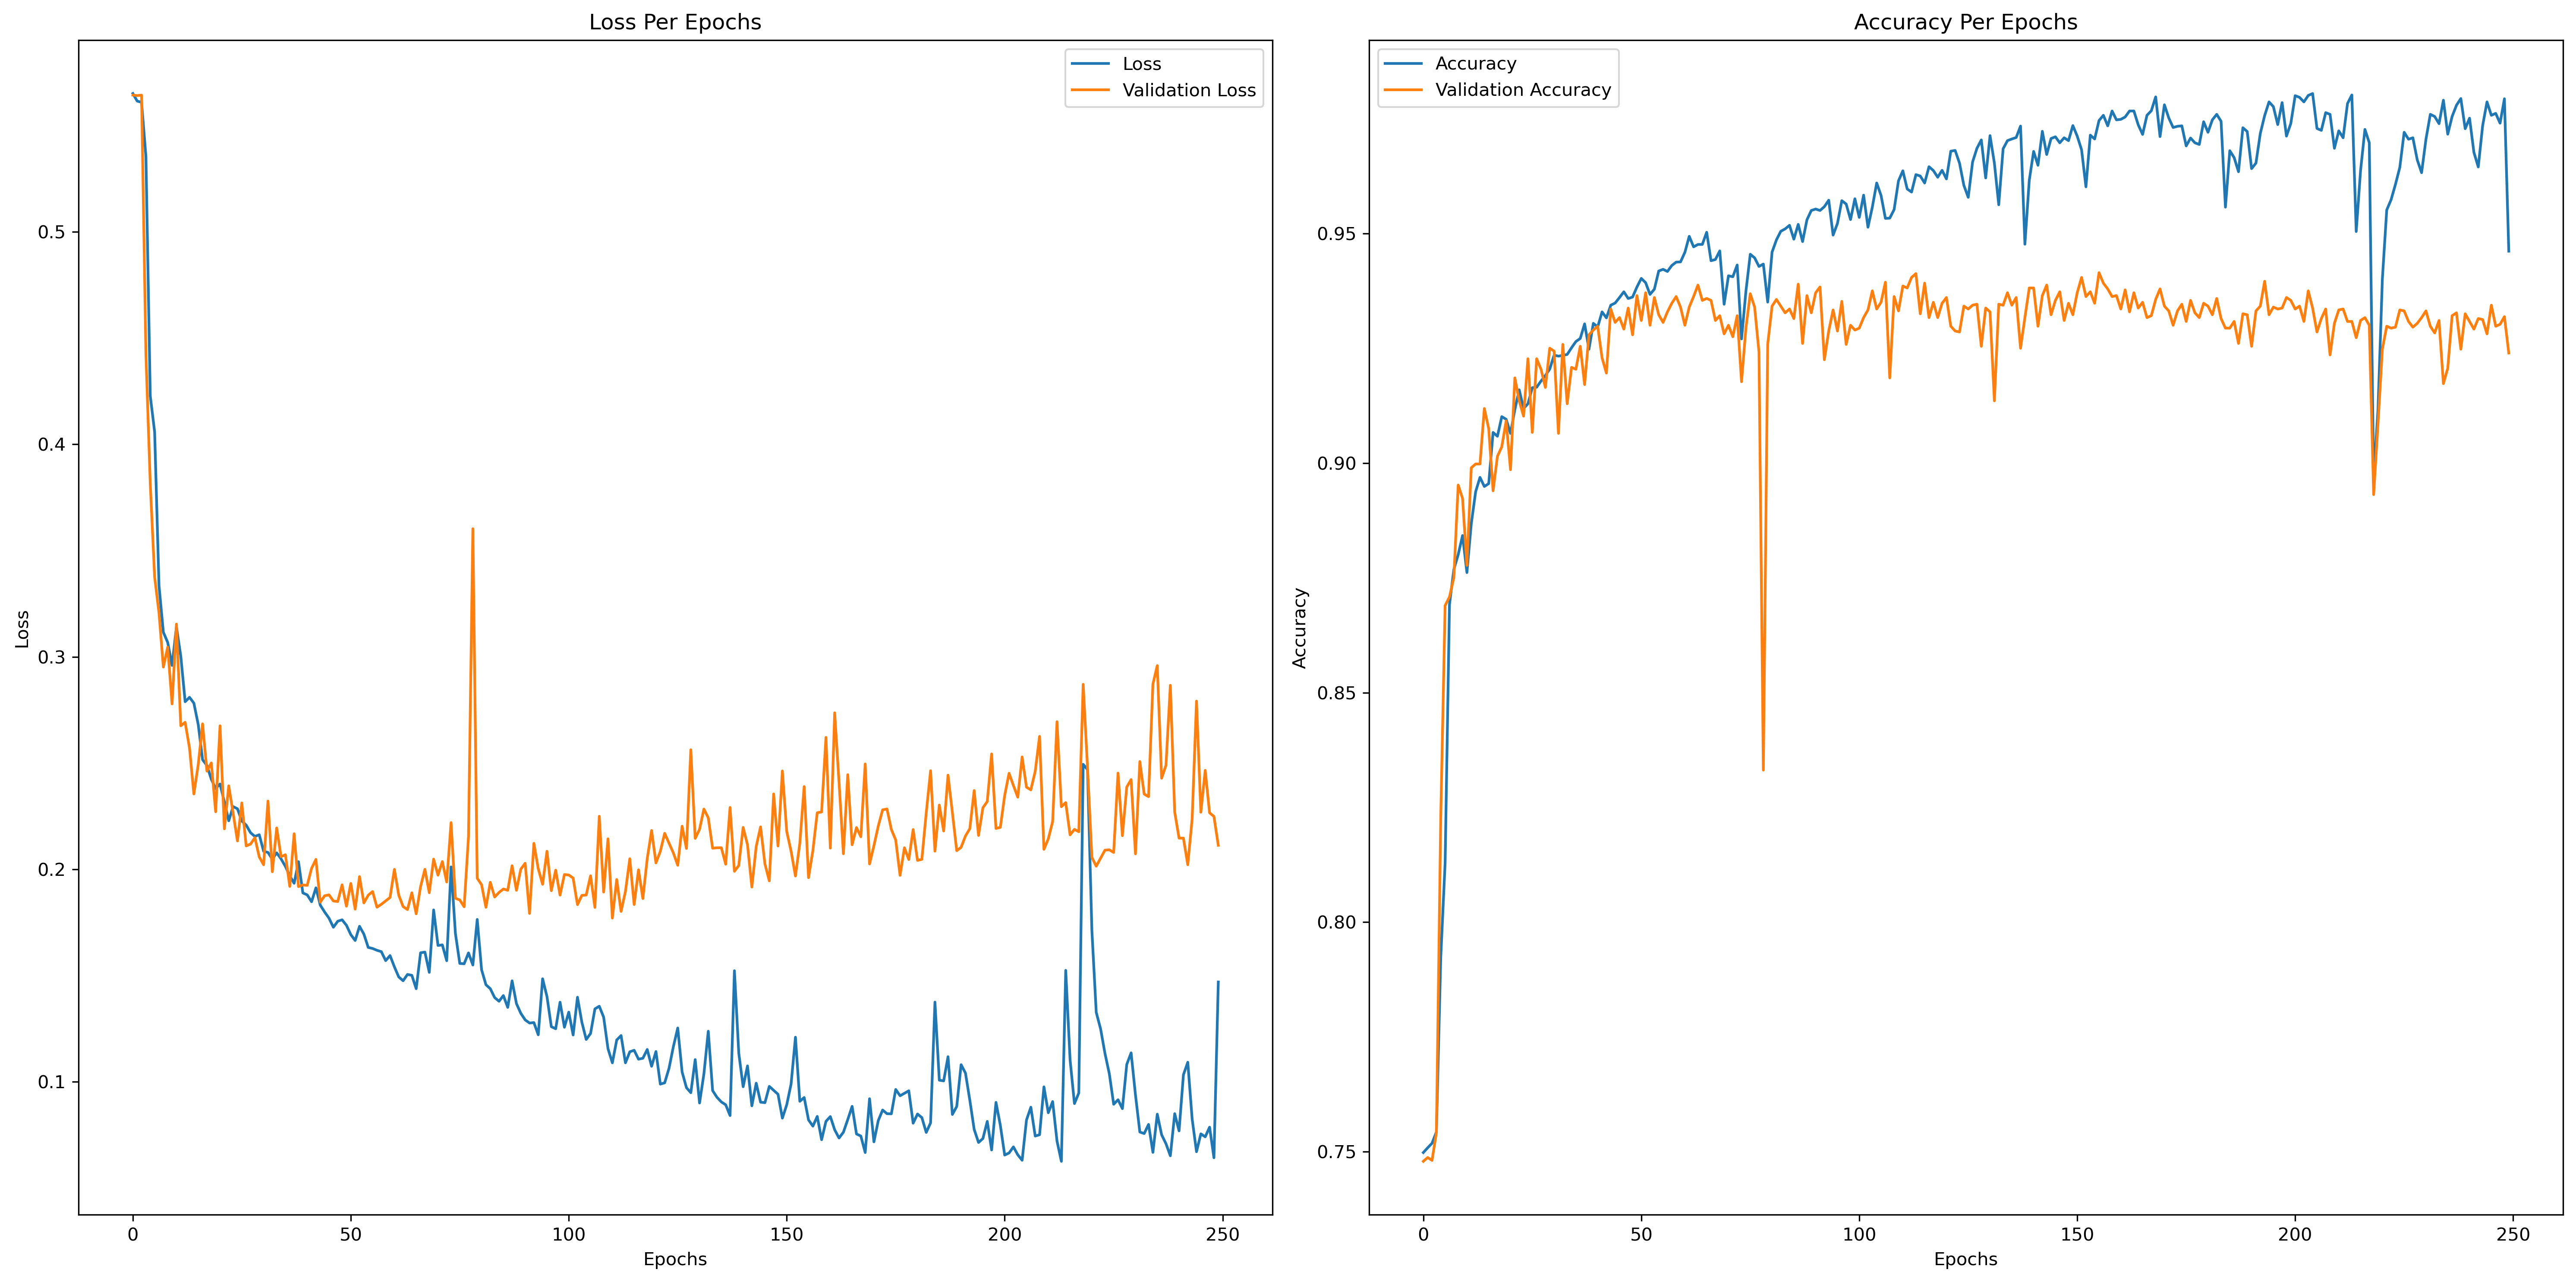

In [124]:
import matplotlib.pyplot as plt
train_hist_m3 = pd.DataFrame(lstm_results.history)
#train_m3 = round(time.time() - t0, 3)
plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

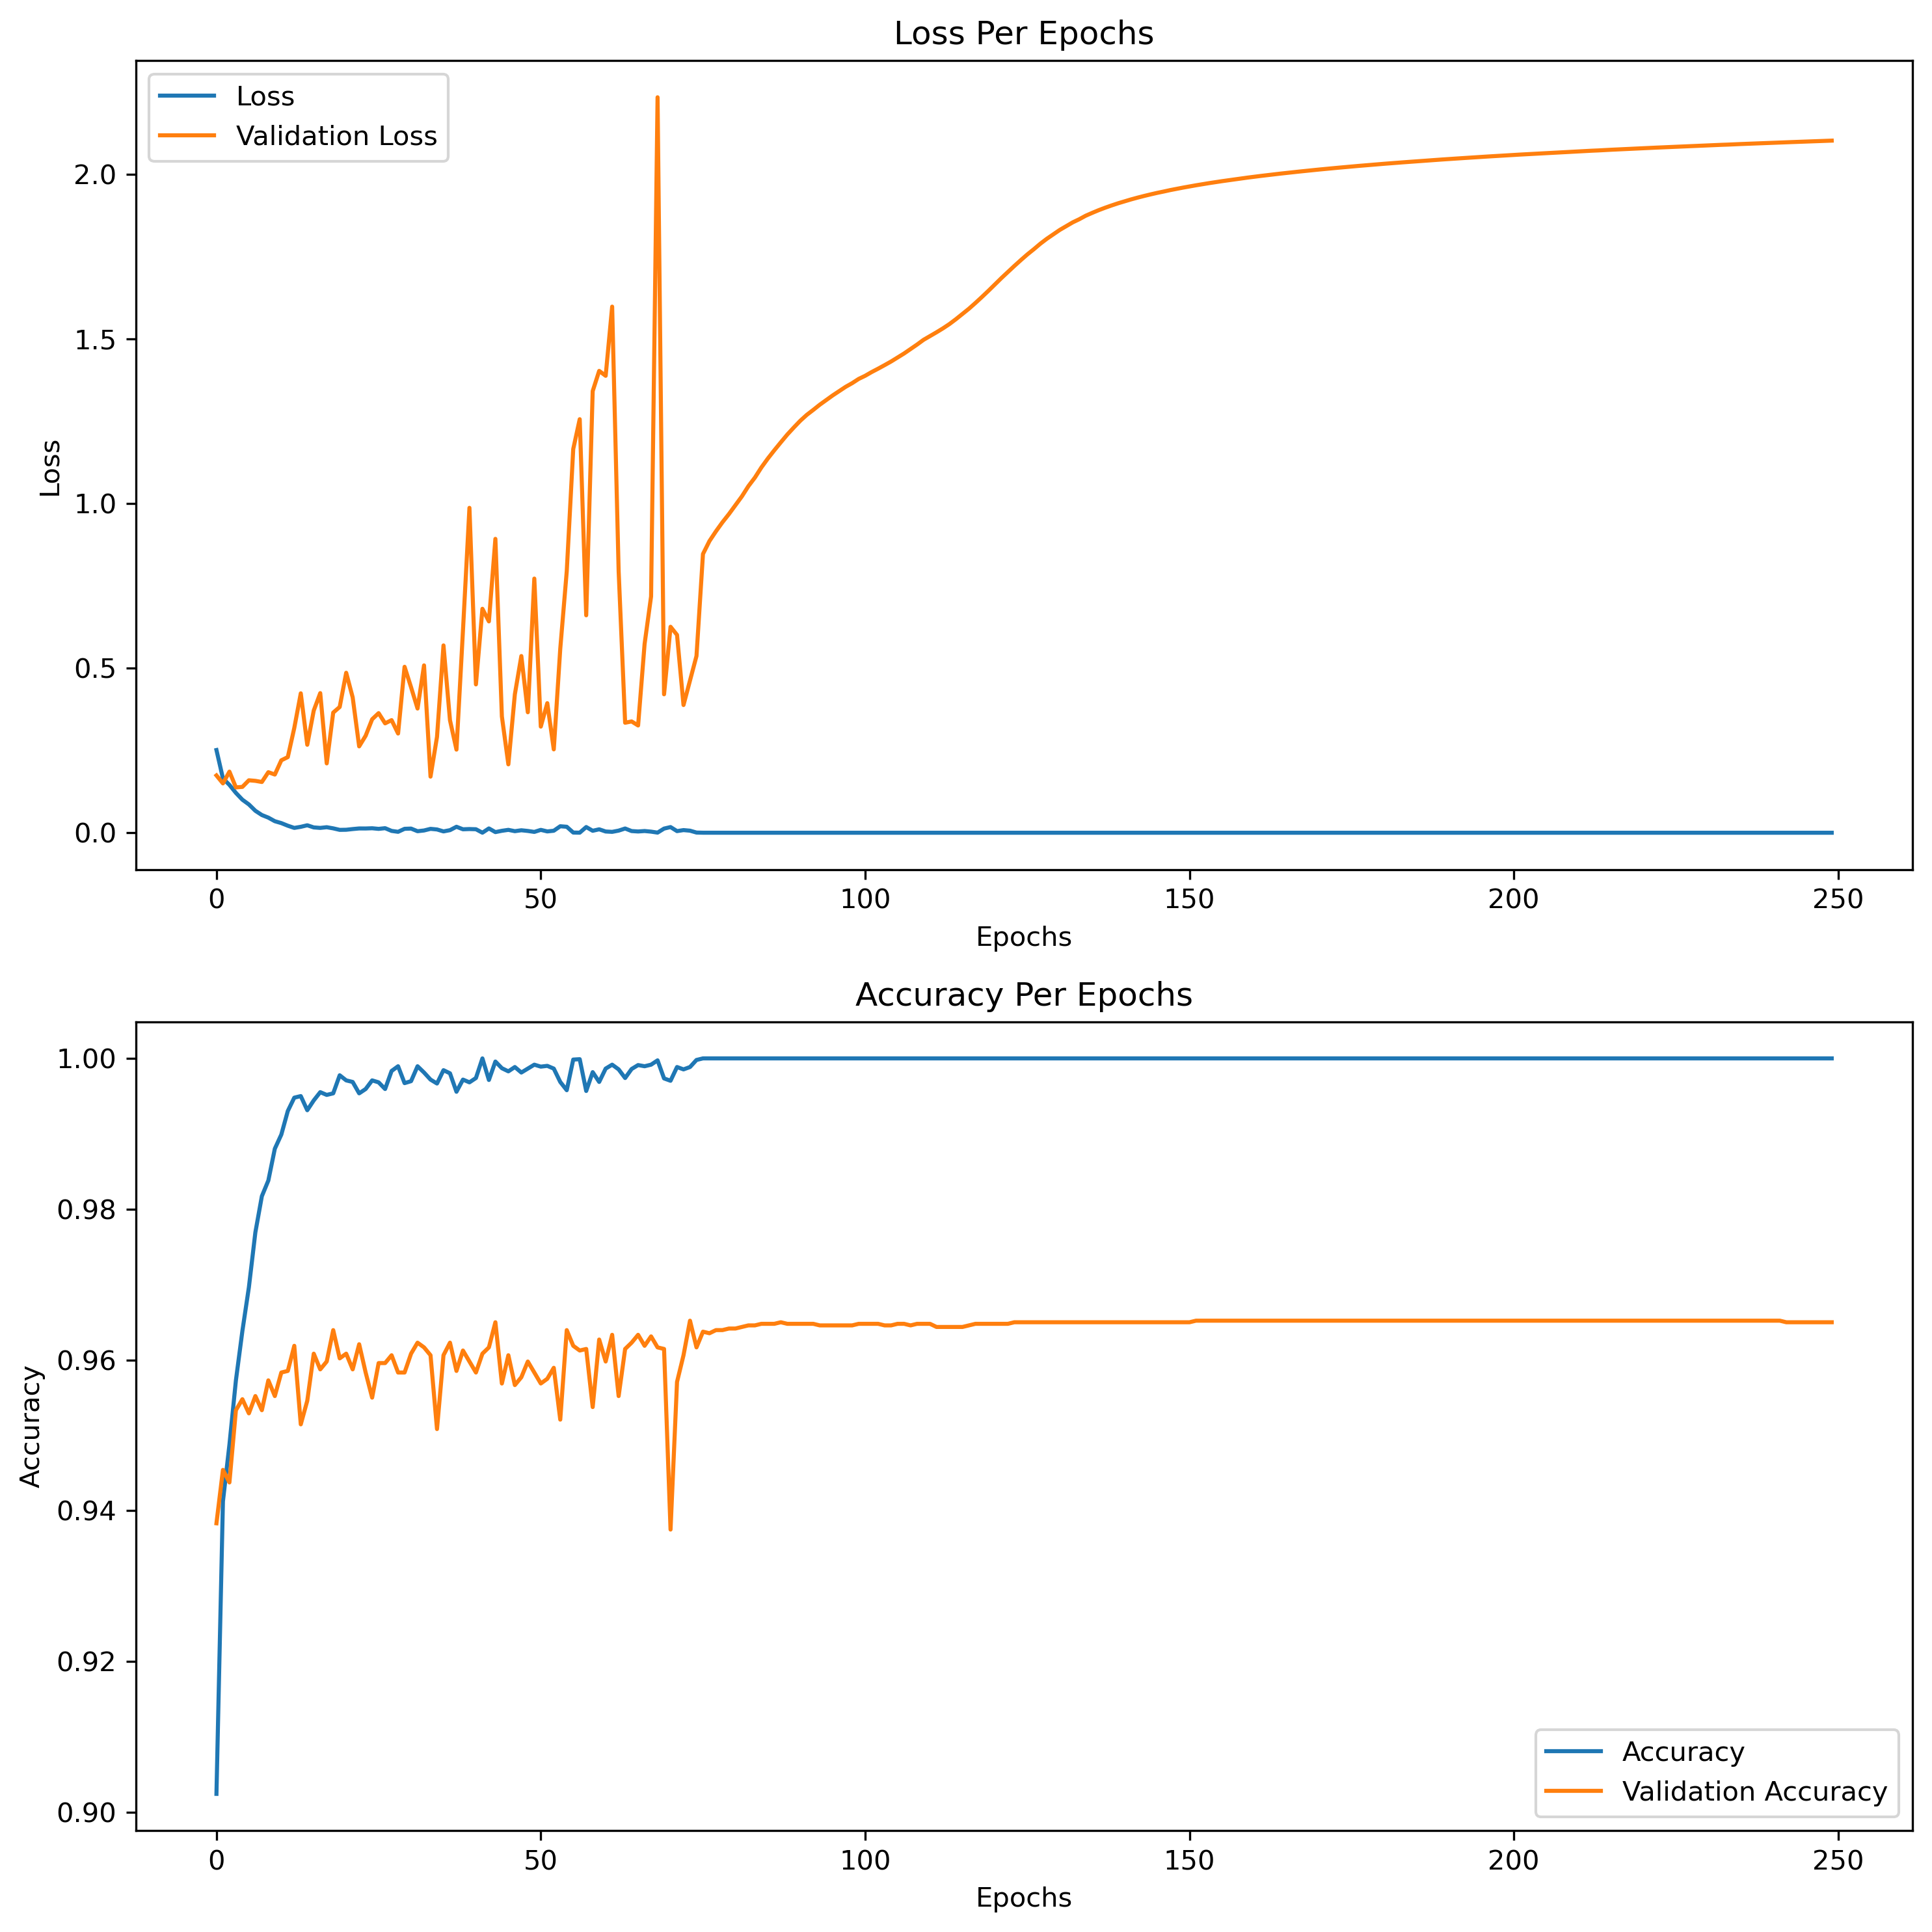

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(2, 1, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(2, 1, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[1018  192]
 [ 173 3417]]
        male  female
male    1018     192
female   173    3417


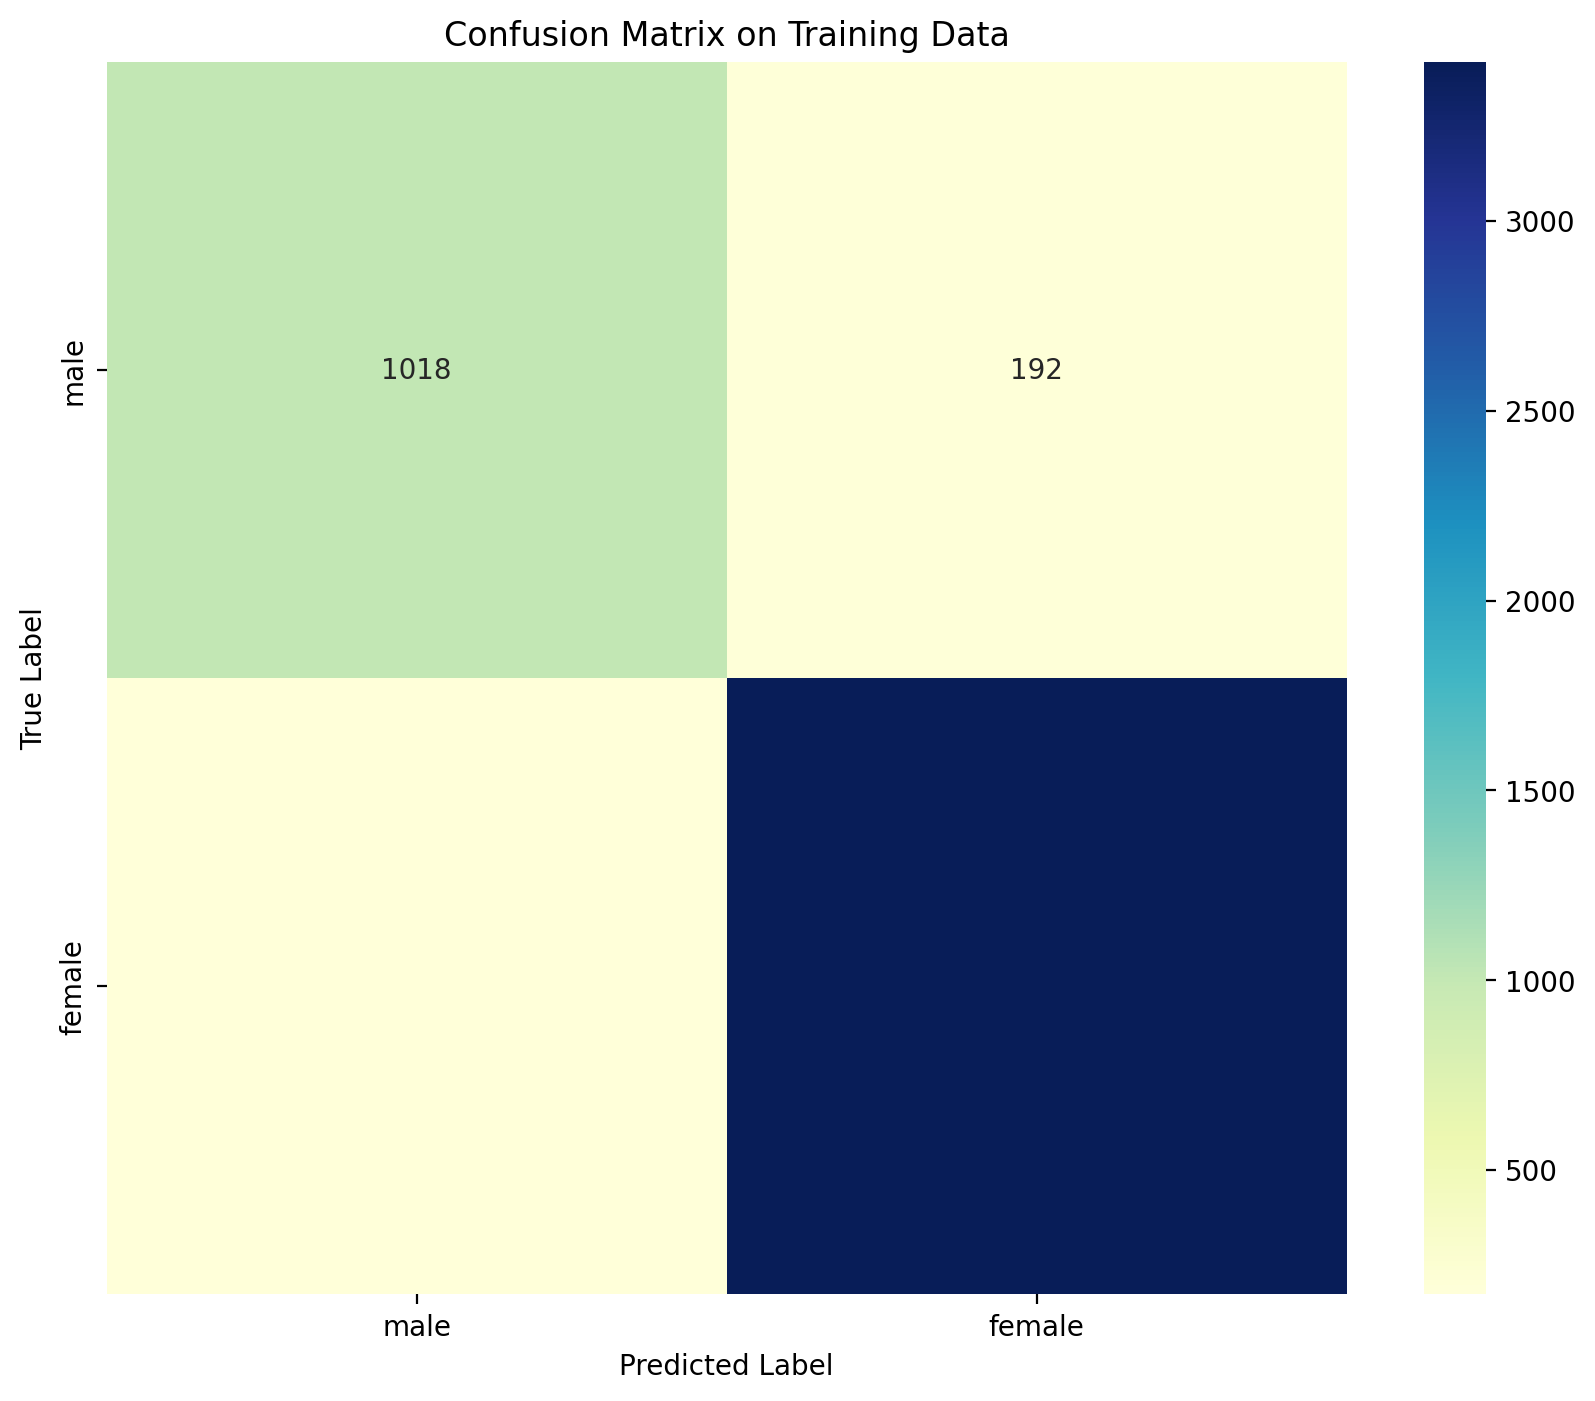

Accuracy   : 0.9239583333333333


In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
# Define the labels for the classification report
labels = ['male','female']
df_cm = pd.DataFrame(confusion_mat, index=['male','female'], columns= ['male','female'])
print(df_cm)
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

## RNN

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1000, activation='relu'))
rnn_model.add(Dense(750, activation='relu'))
rnn_model.add(Dense(500, activation='relu'))
rnn_model.add(Dense(250, activation='relu'))
rnn_model.add(Dense(100, activation='relu'))
rnn_model.add(Dense(50, activation='relu'))
num_classes = 2 # Replace 3 with the actual number of classes in your data
rnn_model.add(Dense(num_classes, activation='softmax'))

rnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,648 (5.20 MB)

 Trainable params: 1,363,648 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_results=rnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.7506 - loss: 0.5674 - val_accuracy: 0.7479 - val_loss: 0.5657
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7500 - loss: 0.5636 - val_accuracy: 0.7479 - val_loss: 0.5685
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7507 - loss: 0.5581 - val_accuracy: 0.7483 - val_loss: 0.5643
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7636 - loss: 0.5230 - val_accuracy: 0.8967 - val_loss: 0.2914
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8861 - loss: 0.2949 - val_accuracy: 0.8910 - val_loss: 0.2850
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8960 - loss: 0.2777 - val_accuracy: 0.9127 - val_loss: 0.2305
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9046 - loss: 0.2490 - val_accuracy: 0.9137 - val_loss: 0.2357
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9089 - loss: 0

In [131]:
rnn_model.save("rnn_model.h5")
print("rnn_model  Saved")

rnn_model  Saved


In [132]:
# function to predict the feature
def RNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(rnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("RNN has predicted the class as  --> ", predicted_class[0])

In [133]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
RNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
RNN has predicted the class as  -->  male


In [134]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['male','female']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1210
           1       0.96      0.95      0.95      3590

    accuracy                           0.93      4800
   macro avg       0.91      0.91      0.91      4800
weighted avg       0.93      0.93      0.93      4800

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

        male       0.85      0.87      0.86      1210
      female       0.96      0.95      0.95      3590

    accuracy                           0.93      4800
   macro avg       0.91      0.91      0.91      4800
weighted avg       0.93      0.93      0.93      4800



In [84]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['teenagers','adults','senioradults']
# Generate classification report
print(classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels))

150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
              precision    recall  f1-score   support

   teenagers       0.60      0.69      0.65      1584
      adults       0.80      0.72      0.76      1621
senioradults       0.79      0.76      0.77      1595

    accuracy                           0.72      4800
   macro avg       0.73      0.72      0.73      4800
weighted avg       0.73      0.72      0.73      4800



In [135]:
train_hist_m4 = pd.DataFrame(lstm_results.history)
#train_m4 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = rnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = rnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[1054  156]
 [ 180 3410]]


ValueError: Shape of passed values is (2, 2), indices imply (6, 6)

<Figure size 2000x1600 with 0 Axes>

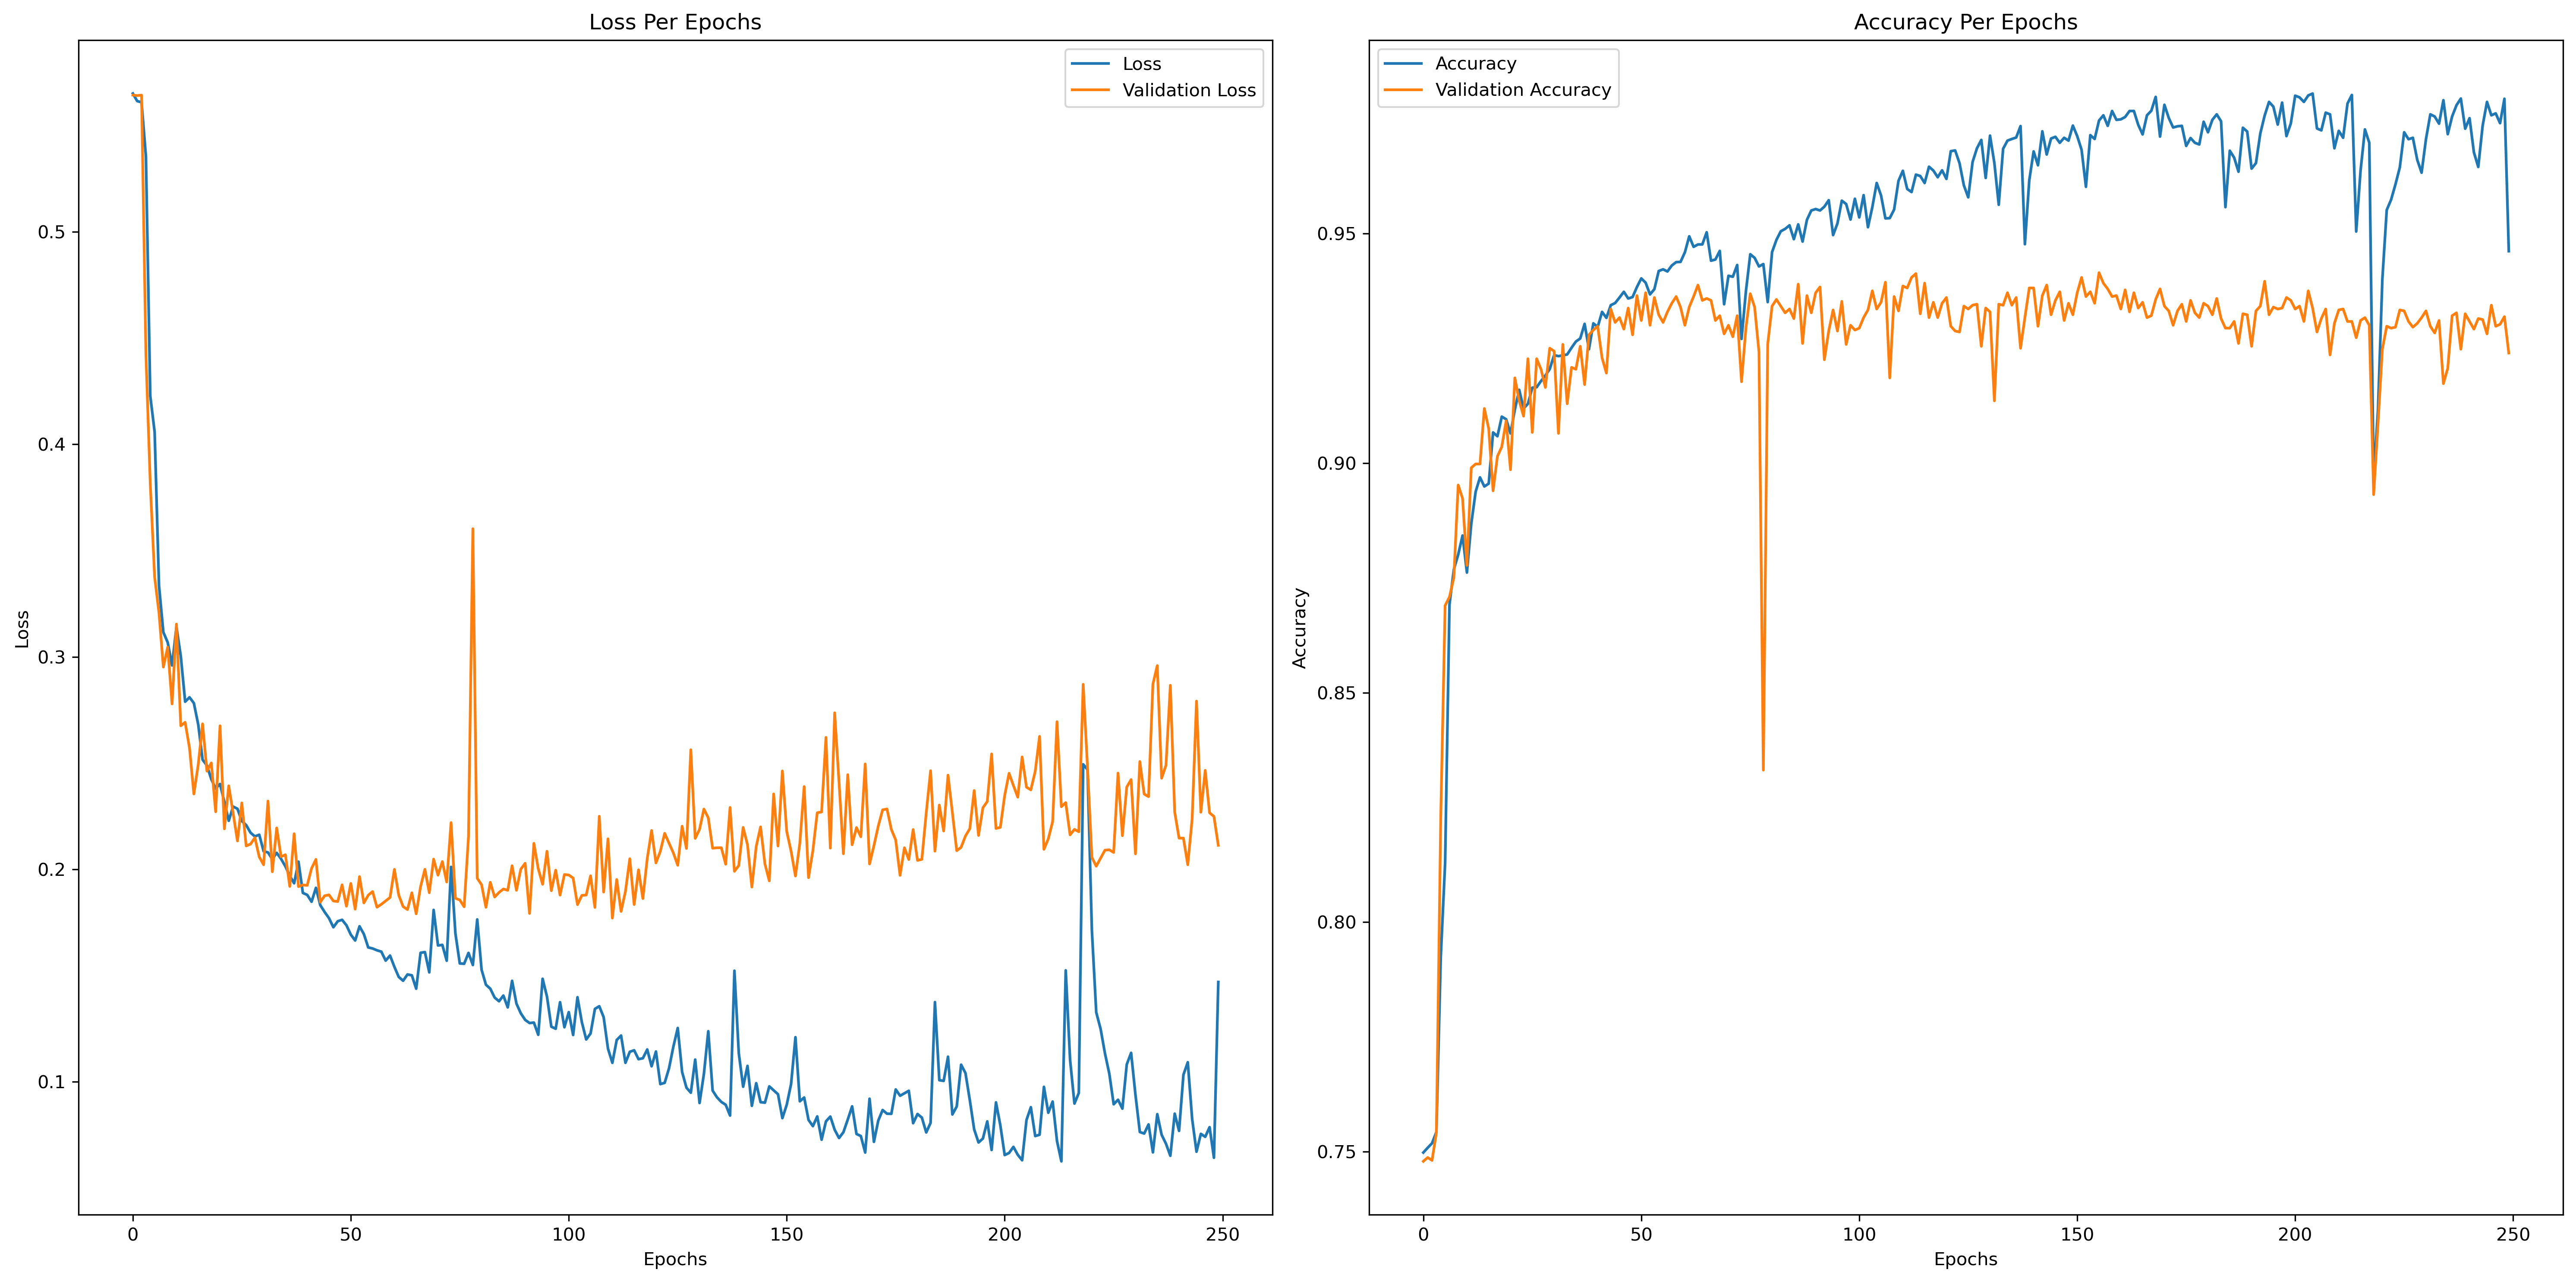

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m4[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m4[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()